# **The Algonauts Project 2025 Challenge - Development Kit Tutorial**

![](https://drive.google.com/uc?export=view&id=1DX5lpgDLtCw-G-Gs-1ayQq8zcIiUiQXB)

## The Algonauts Project
The [Algonauts Project](https://algonautsproject.com/), first launched in 2019, is on a mission to bring biological and machine intelligence researchers together on a common platform to exchange ideas and pioneer the intelligence frontier. Inspired by the astronauts' exploration of space, "algonauts" explore biological and artificial intelligence with state-of-the-art algorithmic tools, thus advancing both fields.

## The 2025 challenge


Encoding models of neural responses are increasingly used as predictive and explanatory tools in computational neuroscience ([Kay et al., 2008](https://doi.org/10.1038/nature06713); [Kell et al., 2018](https://doi.org/10.1016/j.neuron.2018.03.044); [Kriegeskorte and Douglas, 2019](https://doi.org/10.1016/j.conb.2019.04.002); [Naselaris et al., 2011](https://doi.org/10.1016/j.neuroimage.2010.07.073); [Tuckute et al., 2023](https://doi.org/10.1371/journal.pbio.3002366); [Van Gerven, 2017](https://doi.org/10.1016/j.jmp.2016.06.009); [Wu et al., 2006](https://doi.org/10.1146/annurev.neuro.29.051605.113024); [Yamins and DiCarlo, 2016](https://doi.org/10.1038/nn.4244)). They consist of algorithms, typically based on deep learning architectures, that take stimuli as input, and output the corresponding neural activations, effectively modeling how the brain responds to (i.e., encodes) these stimuli. Thus, the goal of the 2025 challenge is to provide a platform for biological and artificial intelligence scientists to cooperate and compete in developing cutting-edge functional magnetic resonance imaging (fMRI) encoding models. Specifically, these models should predict fMRI response to multimodal naturalistic movies, and generalize outside their training distribution.

The challenge is based on data from the Courtois Project on Neuronal Modelling ([CNeuroMod](https://www.cneuromod.ca/)), which has acquired the dataset that, to date, most intensively samples single-subject fMRI responses to a variety of naturalistic tasks, including movie watching. For more details on the challenge you can visit the [website](https://algonautsproject.com/), read the [preprint](!!!), or watch [this video](!!!).

## Tutorial overview

This Development Kit Tutorial will help you to get started with the Algonauts 2025 challenge. It is divided into four sections, **each of which can be run independently**, where you will:
1. Familiarize yourself with the challenge data.
2. Learn to extract the stimulus features used to train and validate an fMRI encoding model.
3. Train and validate an fMRI encoding model.
4. Prepare and format fMRI predictions from an encoding model for challenge submission.

There is an additional initial configuration section (`0 | Configuration`) that needs to be run prior to running the other sections.

<font color='red'><b>NOTE:</b></font> **Even if you're not interested in the Algonauts Project 2025 challenge, you might still find this tutorial useful as an introduction to encoding models of fMRI responses to multimodal movie stimuli.**

## Additional tutorial information

For a walkthrough of the current Development Kit Tutorial, please see [this video](!!!).

You can run this tutorial either on [Colab](https://colab.research.google.com/drive/1fop0zvaLBLBagvJRC-HDqGDSgQElNWZB?usp=sharing), or on [Jupyter Notebook](https://github.com/courtois-neuromod/algonauts_2025.competitors/tree/main/tutorial/algonauts_2025_challenge_tutorial.ipynb).

On Colab, the running time of each tutorial section is only of a few minutes, with the exception of feature extraction in `Section 2`, which takes approximately 25 minutes using a GPU, and 1 hour using CPU.

This tutorial was created by [Alessandro Gifford](https://www.alegifford.com/) and [Domenic Bersch](!!!). If you experience problems with the code, please get in touch with the Algonauts Team (algonauts.mit@gmail.com).

## 2025 challenge resources

- [Website](https://algonautsproject.com/)
- [Paper]
- [Data](https://forms.gle/kmgYdxR92H4nUBfH7)
- [Challenge Development Kit Tutorial](https://colab.research.google.com/drive/1fop0zvaLBLBagvJRC-HDqGDSgQElNWZB?usp=sharing)
- [Codabench Challenge Submission Page](https://www.codabench.org/competitions/4313/)
- [Challenge Overview Video]
- [Development Kit Tutorial Walkthrough Video]
- [Codabench Submission Walkthrough Video]
- [CNeuroMod](https://www.cneuromod.ca/)

## Citations

If you use any of the resources, data or code provided for the Algonauts Project 2025 challenge, please cite the following papers:

> * Gifford AT, Bersch D, St-Laurent M, Pinsard B, Boyle J, Bellec L, Oliva A, Roig G, Cichy RM. 2025. The Algonauts Project 2025 Challenge: How the Human Brain Makes Sense of Multimodal Movies. _arXiv preprint_, arXiv:???. DOI: [https://doi.org/???](!!!)
> * CNeuroMod paper?

---

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access the tutorial data`, you will need to run different code cells depending on whether you are running the tutorial on Colab or as a Jupyter Notebook. An `if statement` takes care of this. Just select `'colab'` or `'jupyter_notebook'` for the `platform` variable in the cell below.

Furthermore, you can select whether to run the code only on CPU (`'cpu'`), or also using a GPU (`'cuda'`) by setting the `device` variable. We recommend using a GPU to run tutorial `Section 2` (stimuli feature extraction), and CPU to run all the other sections (since their compute time won't change if using GPU).

In [ ]:
# Select platform
platform = 'colab' #@param ['colab', 'jupyter_notebook']

# Select device for computation
device = 'cpu' # @param ['cpu', 'cuda']

print(f'Running on "{platform}" using "{device}" device!')

Running on "colab" using "cpu" device!


## 0.1 | Install and import the necessary Python libraries

### 0.1.1 Install libraries for Google Colab

If you are running the tutorial on Google Colab, you first need to install a few libraries with `pip`.

In [ ]:
if platform == 'colab':
  !pip install ipywidgets
  !pip install moviepy
  !pip install nilearn
  !pip install git+https://github.com/facebookresearch/pytorchvideo
  !pip install pysoundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 54.6 MB/s eta 0:00:00
  Cloning https://github.com/facebookresearch/pytorchvideo to /tmp/pip-req-build-q44v70kg
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo /tmp/pip-req-build-q44v70kg
  Resolved https://github.com/facebookresearch/pytorchvideo to commit ae9cfc6e62ca49eb9721a7a56e1e13e348ad21dc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 39.8 MB/s eta 0:00:00
  Created wheel for pytorchvideo: filename=pytorchvideo-0.1.5-py3-none-any.whl size=213013 sha256=d8fb217c43d844affd560e20a9cb26e167381b4d07d06e31bb8

### 0.1.2 | Install libraries for Jupyter Notebook

If you are running the tutorial in a Jupyter Notebook, you need to install the following libraries before running the tutorial:

[h5py][h5py], [IPython][IPython], [ipywidgets][ipywidgets], [jupyter][jupyter], [librosa][librosa], [moviepy][moviepy], [ned][ned_git], [nibabel][nibabel], [nilearn][nilearn], [numpy][numpy], [pandas][pandas], [pillow][pil], [pytorchvideo][pytorchvideo], [scipy][scipy], [sklearn][sklearn], [torch][torch], [torchvision][torchvision], [tqdm][tqdm], [transformers][transformers].

[h5py]: https://docs.h5py.org/en/stable/
[IPython]: https://ipython.org/
[ipywidgets]: https://ipywidgets.readthedocs.io/en/stable/
[jupyter]: https://jupyter.org/
[librosa]: https://librosa.org/doc/latest/index.html
[moviepy]: https://pypi.org/project/moviepy/
[ned_git]: https://github.com/gifale95/NED
[nibabel]: https://nipy.org/nibabel/
[nilearn]: https://nilearn.github.io/stable/index.html
[numpy]: https://numpy.org/
[pandas]: https://pandas.pydata.org/
[pil]: https://pypi.org/project/pillow/
[pytorchvideo]: https://pytorchvideo.org/
[scipy]: https://scipy.org/
[sklearn]: https://scikit-learn.org/stable/
[torch]: https://pytorch.org/
[torchvision]: https://pytorch.org/vision/stable/index.html
[tqdm]: https://tqdm.github.io/
[transformers]: https://huggingface.co/docs/transformers/en/index

### 0.1.3 | Import libraries

Once you have installed all necessary libraries, import them with the following code.

In [ ]:
import os
from pathlib import Path
import glob
import re
import numpy as np
import pandas as pd
import h5py
import torch
import librosa
import ast
import string
import zipfile
from tqdm.notebook import tqdm
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
import cv2
import nibabel as nib
from nilearn import plotting
from nilearn.maskers import NiftiLabelsMasker
import ipywidgets as widgets
from ipywidgets import VBox, Dropdown, Button
from IPython.display import Video, display, clear_output
from moviepy.editor import VideoFileClip
from transformers import BertTokenizer, BertModel
from torchvision.transforms import Compose, Lambda, CenterCrop
from torchvision.models.feature_extraction import create_feature_extractor
from pytorchvideo.transforms import Normalize, UniformTemporalSubsample, ShortSideScale

  if event.key is 'enter':



## 0.2 | Access the tutorial data

### 0.2.1 | Access the data on Google Colab

If you are running the tutorial on Google Colab, you need to connect the tutorial data, which is stored on a Google Drive public folder called `algonauts_2025_challenge_tutorial_data`, to this Colab notebook. For this, follow four easy steps:

1. Fill out [this form](https://docs.google.com/forms/d/e/1FAIpQLScWw5_uBPzFWD-FTXcRZRYBASOJutKwYevMZ8fOAY2RYYZstw/viewform?usp=sf_link) to obtain the tutorial data folder link.
2. Select the folder on Google Drive, and choose `Organise --> Add shortcut`. This will create a shortcut of the folder to a desired path in your Google Drive without copying the actual data or taking space (see the screenshot below for a visualization of this step).
3. Edit the `root_data_dir` variable in the code cell below with the path to the `algonauts_2025_challenge_tutorial_data` shortcut folder on your Google Drive.
4. Mount your Google Drive to this Colab notebook using `drive.mount()`, by running the code cell below.

![](https://drive.google.com/uc?export=view&id=13_x3ahpu0COg2zEUTrTQ37twWUupg6mP)

In [ ]:
# Mount your Google Drive to this Colab notebook
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    root_data_dir = '/content/drive/MyDrive/algonauts_2025_challenge_tutorial_data' #@param {type:"string"}


Mounted at /content/drive/


### 0.2.2 | Access the tutorial data on a Jupyter Notebook

If you are running the tutorial on a Jupyter Notebook, you first need to download the tutorial data from a public Google Drive folder called `algonauts_2025_challenge_tutorial_data` (fill out [this form](https://docs.google.com/forms/d/e/1FAIpQLScWw5_uBPzFWD-FTXcRZRYBASOJutKwYevMZ8fOAY2RYYZstw/viewform?usp=sf_link) to obtain the tutorial data folder link).

Once you have downloaded the tutorial data, edit the `root_data_dir` variable in the cell below with the path to the `algonauts_2025_challenge_tutorial_data` folder.

In [ ]:
if platform == 'jupyter_notebook':
    root_data_dir = '../algonauts_2025_challenge_tutorial_data'

### 0.2.3 | Overview of the downloaded tutorial data

The `algonauts_2025_challenge_tutorial_data` folder is organized into three subfolders:
- **`algonauts_2025.competitors`:** Multimodal movie stimuli (i.e., `.mkv` files of audiovisual movies, and `.tsv` files containing timestamped movie transcripts) and corresponding fMRI responses from the CNeuroMod dataset. You will familiarize yourself with these data in `Section 1`. In `Section 2`, you will extract **visual**, **audio** and **language** stimulus features from the multimodal movie stimuli, and in `Section 3` you will use them with their corresponding fMRI responses to train and validate brain encoding models.
- **`stimulus_features`:** Raw and PCA-downsampled **visual**, **audio**, and **language** stimulus features, extracted from the challenge movie stimuli. You will learn how to extract these features in `Section 2`, you will use them in `Section 3` to train and validate encoding models, and in `Section 4` to prepare the challenge submission.
- **`trained_encoding_models`:** Encoding models trained using **visual**, **audio**, **language**, or **all** stimulus features. You will use these models in `Section 4` to learn how to prepare challenge submissions.

---

# 1 | Familiarize yourself with the challenge data

![](https://drive.google.com/uc?export=view&id=1V9boHQzQpJxgUJHUm5laOZ-f6WO28X9P)

The challenge data comes from the [CNeuroMod](https://www.cneuromod.ca/) dataset. It consists of almost 80 hours of multimodal movie stimuli, and corresponding whole-brain time series fMRI responses of four subjects. Challenge participants will train and evaluate their encoding models using a subset of CNeuroMod's data which includes almost 80 hours of multimodal movie stimuli and corresponding fMRI responses. The stimuli consist of movie visual frames, audio samples, and time-stamped language transcripts. The neural data consist of whole-brain fMRI responses for four CNeuroMod subjects (sub-01, sub-02, sub-03 and sub-05), normalized to the Montreal Neurological Institute (MNI) spatial template ([Brett et al., 2002](https://doi.org/10.1038/nrn756)), and processed as time series whose signal is assigned to 1,000 functionally defined brain parcels ([Schaefer et al., 2018](https://doi.org/10.1093/cercor/bhx179)).

The 2025 challenge includes two main phases, followed by a post-challenge phase. Each phase involves a different data subset:

1. **Model building phase (6 months, January 6 2025 - July 6 2025):** During this first phase, challenge participants will train and test encoding models using movie stimuli and fMRI responses from the same distribution. For *model training*, we provide 55 hours of movie stimuli and corresponding fMRI responses for each of the four subjects for all episodes of seasons 1 to 6 of the sitcom *Friends*. We also provide 10 hours of movie stimuli and corresponding fMRI responses from the *Movie10* dataset for which the same four subjects watched the following four movies: *The Bourne Supremacy*, *Hidden Figures*, *Life* (a BBC nature documentary), and *The Wolf of Wall Street*. Each movie was presented to each subject once, except for *Life* and *Hidden Figures* which were presented twice. Challenge participants can train their encoding models using these data. For *model testing*, we provide 10 hours of movie stimuli for all episodes of seasons 7 of Friends, and withhold the corresponding fMRI responses for each subject. Challenge participants can test their encoding models against the withheld fMRI responses by submitting predicted fMRI responses for Friends season 7 to [Codabench](https://www.codabench.org/competitions/4313/). After each submission, the scoring program will correlate (Pearson’s *r*) the predicted fMRI responses for each parcel and subject with the recorded (withheld) fMRI responses across all Friends season 7 episodes, resulting in one correlation score for each parcel and subject. These correlation scores are averaged first across parcels and then across subjects, to obtain a single correlation score quantifying the performance of each submission.

2. **Model selection phase (1 week, July 6 2025 - July 13 2025):** During this second phase, the winning models will be selected based on the accuracy of their predicted fMRI responses for withheld OOD movie stimuli. We will provide 2 hours of out-of-distribution (OOD) movie stimuli, and withhold the corresponding fMRI responses for each of the four subjects. The nature of the OOD movie stimuli will not be revealed until the beginning of the model selection phase. To participate in the winners selection process, challenge participants can submit their encoding model’s predicted fMRI responses for the OOD movie stimuli to [Codabench](https://www.codabench.org/competitions/4313/). After each submission, the scoring program will correlate the predicted fMRI responses for each parcel and subject with the recorded (withheld) fMRI responses, independently for each of the OOD movie stimuli, resulting in one correlation score for each parcel, OOD movie and subject. These correlation scores are averaged first across parcels, then across OOD movies, and finally across subjects, thus obtaining a single correlation score quantifying the performance of each submission.

3. **Post-challenge phase (indefinite, from July 13 2025):** Once the challenge is over, we will open an indefinite post-challenge phase which will serve as a public benchmark. This benchmark will consist of two separate leaderboards that will rank encoding models based on their fMRI predictions for in-distribution (Friends season 7) or out-of-distribution (OOD movies) multimodal movie stimuli, respectively.

In this tutorial, you will familiarize yourself with the data from the **Model building phase**. You will learn how to use those data to train and validate encoding models, and to prepare the model predictions for Friends season 7 for challenge submission.


## 1.1 | Multimodal movie stimuli

The multimodal (**audio**, **visual** and **language**) stimuli of the Algonauts 2025 challenge consist of `.mkv` files of audiovisual movies, and of `.tsv` files that contain corresponding timestamped movie transcripts.

### 1.1.1 | .mkv files (audiovisual movie stimuli)

The `.mkv` files consist of movies that combine the visual and audio modalities, for seasons 1 to 7 of Friends and for Movie10.

#### Friends (seasons 1-7)

The `.mkv` files for seasons 1 to 7 of Friends are found at `../algonauts_2025.competitors/stimuli/movies/friends/s<season>/`, and have the naming convention `friends_s-<season>e<episode><episode_split>.mkv`, where:
- **`season`:** Number indicating the Friends season.
- **`episode`:** Number indicating the Friends episode.
- **`episode_split`:** Full episodes were split into shorter (~12 min) segments watched by participants inside the MRI in order to reduce the duration of fMRI data acquisition runs. Letters indicate the split of each episode. Most Friends episodes are split into two parts (i.e., splits `a` and `b`), but a handful of longer episodes are split into four parts (i.e., splits `a`, `b`, `c` and `d`).

#### Movie10

The `.mkv` files for Movie10 are found at `../algonauts_2025.competitors/stimuli/movies/movie10/<movie>/`, and have the naming convention `<movie><movie_split>.mkv`, where:
- **`movie`:** String indicating the movie name.
- **`movie_split`:** Number indicating the movie split. Each movie was split into several segments to limit the duration of consecutive fMRI data acquisition runs.

As an example, here you will load and visualize the file `friends_s01e01a.mkv`, that is, the first half (split `a`) of the first episode from the first season of Friends.

In [ ]:
def load_mkv_file(movie_path):
    """
    Load video and audio data from the given .mkv movie file, and additionally
    prints related information.

    Parameters
    ----------
    movie_path : str
        Path to the .mkv movie file.

    """

    # Read the .mkv file
    cap = cv2.VideoCapture(movie_path)

    if not cap.isOpened():
        print("Error: Could not open movie.")
        return

    # Get video information
    video_fps = cap.get(cv2.CAP_PROP_FPS)
    video_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    video_duration = video_total_frames / video_fps
    video_duration_minutes = video_duration / 60

    # Print video information
    print(">>> Video Information <<<")
    print(f"Video FPS: {video_fps}")
    print(f"Video Resolution: {video_width}x{video_height}")
    print(f"Total Frames: {video_total_frames}")
    print(f"Video Duration: {video_duration:.2f} seconds or {video_duration_minutes:.2f} minutes")

    # Release the video object
    cap.release()

    # Audio information
    clip = VideoFileClip(movie_path)
    audio = clip.audio
    audio_duration = audio.duration
    audio_fps = audio.fps
    print("\n>>> Audio Information <<<")
    print(f"Audio Duration: {audio_duration:.2f} seconds")
    print(f"Audio FPS (Sample Rate): {audio_fps} Hz")

    # Extract and display the first 20 seconds of the video
    output_video_path = 'first_20_seconds.mp4'
    video_segment = clip.subclip(0, min(20, video_duration))
    print("\nCreating clip of the first 20 seconds of the video...")
    video_segment.write_videofile(output_video_path, codec="libx264", audio_codec="aac", verbose=False, logger=None)

    # Display the video in the notebook
    display(Video(output_video_path, embed=True, width=640, height=480))


In [ ]:
# Load the .mkv file
movie_path = root_data_dir + "/algonauts_2025.competitors/stimuli/movies/friends/s1/friends_s01e01a.mkv"
load_mkv_file(movie_path)

>>> Video Information <<<
Video FPS: 29.968454258675077
Video Resolution: 720x480
Total Frames: 26412
Video Duration: 881.33 seconds or 14.69 minutes

>>> Audio Information <<<
Audio Duration: 881.33 seconds
Audio FPS (Sample Rate): 44100 Hz

Creating clip of the first 20 seconds of the video...


### 1.1.2 | .tsv files (timestamped movie transcripts)

The `.tsv` files contain the timestamped movie transcripts, that is, transcripts of spoken content (dialogue) in the movie stimuli, for seasons 1 to 7 of Friends and for Movie10.

#### Friends (seasons 1-7)

The `.tsv` files for seasons 1 to 7 of Friends are found at `../algonauts_neuromod.competitors/stimuli/transcripts/friends/s<season>/`, and have the naming convention `friends_s-<season>e<episode><episode_split>.tsv`, where:
- **`season`:** Number indicating the Friends season.
- **`episode`:** Number indicating the Friends episode.
- **`episode_split`:** Letter indicating the split of the episode. Most Friends episodes are split into two parts (i.e., splits `a` and `b`), but a handful of longer episodes are split into four parts (i.e., splits `a`, `b`, `c` and `d`).

#### Movie10

The `.tsv` files for Movie10 are found at `../algonauts_neuromod.competitors/stimuli/transcripts/movie10/<movie>/`, and have the naming convention `movie10_<movie><movie_split>.tsv`, where:
- **`movie`:** String indicating the movie name.
- **`movie_split`:** Number indicating the movie split.

#### .tsv file content

The `.tsv` files splits transcribed movie dialogue into chunks of 1.49 seconds, where each **row** of the `.tsv` file corresponds to one such chunk. This segmentation was performed to facilitate alignment with the fMRI data, since fMRI volumes were acquired with a repetition time (TR) of 1.49 seconds (that is, one fMRI sample was acquired every 1.49 seconds). If no words were spoken during a specific chunk, the corresponding `.tsv` file row will be empty.

The **columns** of the `.tsv` files consist of
different attributes of the language transcripts:
- **`text_per_tr`:** Sentence consisting of words that were spoken during the chunk of interest (i.e., words with word offset within the chunk of interest, even if their onset was in the previous chunk).
- **`words_per_tr`:** List of individual words that were spoken during the chunk of interest.
- **`onsets_per_tr`:** Starting time (in seconds) of each word spoken during the chunk, relative to movie onset.
- **`durations_per_tr`:** Duration (in seconds) of each word spoken during the chunk.

As an example, here you will load the file `friends_s01e01a.tsv`, that is, the trannscript of the first half (split `a`) of the first episode from the first season of Friends, and print the data from the first 20 chunks.

In [ ]:
def load_tsv_file(transcript_path):
    """
    Load and visualize language transcript data from the given .TSV file.

    Parameters
    ----------
    transcript_path : str
        Path to the .tsv transcript file.

    """

    # Load the .tsv into a pandas DataFrame
    transcript_df = pd.read_csv(transcript_path, sep='\t')

    # Select the first 20 rows (chunks)
    sample_transcript_data = transcript_df.iloc[:20]

    # Display the first 20 rows (chunks)
    # The first 11 rows are empty since no words were spoken during the
    # beginning of the episode.
    print("Transcript data (Rows 0 to 20):")
    display(sample_transcript_data)

    # Print other transcript info
    print(f"\nTranscript has {transcript_df.shape[0]} rows (chunks of 1.49 seconds) and {transcript_df.shape[1]} columns.")


In [ ]:
# Load the .tsv file
transcript_path = root_data_dir + "/algonauts_2025.competitors/stimuli/transcripts/friends/s1/friends_s01e01a.tsv"
load_tsv_file(transcript_path)

Transcript data (Rows 0 to 20):


text_per_tr  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
5                                       NaN   
6                                       NaN   
7                                       NaN   
8                                       NaN   
9                                       NaN   
10                                      NaN   
11                                      NaN   
12                                 There's    
13                        nothing to tell.    
14                    Just some guy I work    
15                          with. Come on,    
16          you're going out with the guy.    
17  There's got to be something wrong with    
18                         him. All right,    
19                          joey, be nice.    

                                         words_per_tr  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10                                                 []   
11                                                 []   
12                                        ["There's"]   
13                         ['nothing', 'to', 'tell.']   
14               ['Just', 'some', 'guy', 'I', 'work']   
15                           ['with.', 'Come', 'on,']   
16  ["you're", 'going', 'out', 'with', 'the', 'guy.']   
17  ["There's", 'got', 'to', 'be', 'something', 'w...   
18                          ['him.', 'All', 'right,']   
19                           ['joey,', 'be', 'nice.']   

                                        onsets_per_tr  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10                                                 []   
11                                                 []   
12                                            [18.97]   
13                           [19.178, 19.476, 19.668]   
14            [20.85, 21.316, 21.572, 21.748, 21.908]   
15                             [22.196, 22.9, 23.316]   
16   [23.892, 24.362, 24.548, 24.772, 24.884, 25.028]   
17  [25.252, 25.434, 25.524, 25.668, 25.828, 26.11...   
18                            [26.548, 27.81, 28.148]   
19                           [28.308, 28.698, 28.932]   

                                     durations_per_tr  
0                                                  []  
1                                                  []  
2                                                  []  
3                                                  []  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                                                  []  
9                                                  []  
10                              


Transcript has 591 rows (chunks of 1.49 seconds) and 4 columns.


### 1.2.3 | Align the .mkv movies with the .tsv transcripts

Here, you will align the `.mkv` to the `.tsv` files. Since the `.tsv` files are divided into chunks of 1.49 seconds (in line with the fMRI sampling rate, or TR), to align the `.mkv` and `.tsv` file content, you will first need to divide the `.mkv` movies into chunks of 1.49 seconds.

In [ ]:
def load_transcript(transcript_path):
    """
    Loads a transcript file and returns it as a DataFrame.

    Parameters
    ----------
    transcript_path : str
        Path to the .tsv transcript file.

    """
    df = pd.read_csv(transcript_path, sep='\t')
    return df


def get_movie_info(movie_path):
    """
    Extracts the frame rate (FPS) and total duration of a movie.

    Parameters
    ----------
    movie_path : str
        Path to the .mkv movie file.

    """

    cap = cv2.VideoCapture(movie_path)
    fps, frame_count = cap.get(cv2.CAP_PROP_FPS), cap.get(cv2.CAP_PROP_FRAME_COUNT)
    cap.release()

    return fps, frame_count / fps


def split_movie_into_chunks(movie_path, chunk_duration=1.49):
    """
    Divides a video into fixed-duration chunks.

    Parameters
    ----------
    movie_path : str
        Path to the .mkv movie file.
    chunk_duration : float, optional
        Duration of each chunk in seconds (default is 1.49).

    """

    _, video_duration = get_movie_info(movie_path)
    chunks = []
    start_time = 0.0

    # Create chunks for the specified time
    while start_time < video_duration:
        end_time = min(start_time + chunk_duration, video_duration)
        chunks.append((start_time, end_time))
        start_time += chunk_duration
    return chunks

def extract_movie_segment_with_sound(movie_path, start_time, end_time,
    output_path='output_segment.mp4'):
    """
    Extracts a specific segment of a video with sound and saves it.

    Parameters
    ----------
    movie_path : str
        Path to the .mkv movie file.
    start_time : float
        Start time of the segment in seconds.
    end_time : float
        End time of the segment in seconds.
    output_path : str, optional
        Path to save the output segment (default is 'output_segment.mp4').

    """

    # Create movie segment
    movie_segment = VideoFileClip(movie_path).subclip(start_time, end_time)
    print(f"\nWriting movie file from {start_time}s until {end_time}s")

    # Write video file
    movie_segment.write_videofile(output_path, codec="libx264",
        audio_codec="aac", verbose=False, logger=None)
    return output_path


def display_transcript_and_movie(chunk_index, transcript_df, chunks,
    movie_path):
    """
    Displays transcript, movie, onset, and duration for a selected chunk.

    Parameters
    ----------
    chunk_index : int
        Index of the selected chunk.
    transcript_df : DataFrame
        DataFrame containing transcript data.
    chunks : list
        List of (start_time, end_time) tuples for video chunks.
    movie_path : str
        Path to the .mkv movie file.

    """
    # Retrieve the start and end times for the selected chunk
    start_time, end_time = chunks[chunk_index]

    # Get the corresponding transcript row if it exists in the DataFrame
    transcript_chunk = transcript_df.iloc[chunk_index] if chunk_index < len(transcript_df) else None

    # Display the stimulus chunk number
    print(f"\nChunk number: {chunk_index + 1}")

    # Display transcript details if available; otherwise, indicate no dialogue
    if transcript_chunk is not None and pd.notna(transcript_chunk['text_per_tr']):
        print(f"\nText: {transcript_chunk['text_per_tr']}")
        print(f"Words: {transcript_chunk['words_per_tr']}")
        print(f"Onsets: {transcript_chunk.get('onsets_per_tr', 'N/A')}")
        print(f"Durations: {transcript_chunk.get('durations_per_tr', 'N/A')}")
    else:
        print("No dialogue in this scene.")

    # Extract and display the video segment
    output_movie_path = extract_movie_segment_with_sound(movie_path, start_time,
        end_time)
    display(Video(output_movie_path, embed=True, width=640, height=480))


def create_dropdown_by_text(transcript_df):
    """
    Creates a dropdown widget for selecting chunks by their text.

    Parameters
    ----------
    transcript_df : DataFrame
        DataFrame containing transcript data.

    """

    options = []

    # Iterate over each row in the transcript DataFrame
    for i, row in transcript_df.iterrows():
        if pd.notna(row['text_per_tr']):  # Check if the transcript text is not NaN
            options.append((row['text_per_tr'], i))
        else:
            options.append(("No dialogue in this scene.", i))
    return widgets.Dropdown(options=options, description='Select scene:')


def interface_display_transcript_and_movie(movie_path, transcript_path):
    """
    Interactive interface to align movie and transcript chunks.

    Parameters
    ----------
    movie_path : str
        Path to the .mkv movie file.
    transcript_path : str
        Path to the transcript file (.tsv).

    """

    # Load the transcript data from the provided path
    transcript_df = load_transcript(transcript_path)

    # Split the video file into chunks of 1.49 seconds
    chunks = split_movie_into_chunks(movie_path)

    # Create a dropdown widget with transcript text as options
    dropdown = create_dropdown_by_text(transcript_df)

    # Create an output widget to display video and transcript details
    output = widgets.Output()

    # Display the dropdown and output widgets
    display(dropdown, output)

    # Define the function to handle dropdown value changes
    def on_chunk_select(change):
        with output:
            output.clear_output()  # Clears previous content
            chunk_index = dropdown.value
            display_transcript_and_movie(chunk_index, transcript_df, chunks,
                movie_path)

    dropdown.observe(on_chunk_select, names='value')

In [ ]:
# Align the .mkv movies and .tsv language transcripts
interface_display_transcript_and_movie(movie_path, transcript_path)

Dropdown(description='Select scene:', options=(('No dialogue in this scene.', 0), ('No dialogue in this scene.…

Output()

## 1.2 | fMRI data

The Algonauts 2025 Challenge uses fMRI data from four [CNeuromod](https://www.cneuromod.ca/) subjects (`sub-01`, `sub-02`, `sub-03` and `sub-05`). For each subject, the data include fMRI responses to each movie, brain atlases, and the number of samples (in chunks of 1.49s) for the withheld fMRI responses to the test movie stimuli.

### fMRI responses

The fMRI responses are found at `../algonauts_2025.competitors/fmri/sub-0X/func/`. They consist of whole-brain fMRI responses to
seasons 1 to 6 of Friends and to Movie10 for four subjects. These fMRI responses are normalized to the Montreal Neurologcal Institute (MNI) spatial template ([Brett et al., 2002](https://doi.org/10.1038/nrn756)), processed as time series whose signal is assigned to 1,000 functionally defined brain parcels ([Schaefer et al., 2018](https://doi.org/10.1093/cercor/bhx179)), and saved in `.h5` files (one file for Friends season 1-6 and one for Movie10 for each subject).

Each `.h5` file consists of multiple fMRI datasets, corresponding to different movie segments, where every dataset consists of a 2D array of shape `(N samples, 1,000 parcels)`. Since the fMRI responses were collected with a repetition time (TR) of 1.49 seconds, one fMRI sample was recorded every 1.49 seconds worth of movie watching.

#### Friends (seasons 1-6)

For fMRI responses to Friends, the datasets within the `.h5` files have the following naming convention `ses-<recording_session>_task-s<season>e<episode><episode_split>`, where:
- **`recording_session`:** Number indicating the fMRI recording session (data were acquired over multiple scanning sessions spread across multiple days).
- **`season`:** Number indicating the Friends season.
- **`episode`:** Number indicating the Friends episode.
- **`episode_split`:** Letter indicating the split of the episode. Most Friends episodes are split into two parts (i.e., splits `a` and `b`), but a handful of longer episodes are split into four parts (i.e., splits `a`, `b`, `c` and `d`).

<font color='red'><b>NOTE:</b></font> most, but not all Friends episodes were presented according to the series order (for example, fMRI responses for episode 1 of season 1 were collected during the second or third recording session).

<font color='red'><b>MISSING fMRI DATA:</b></font>
* Subject 2 is missing `s05e20a`.
* Subject 5 is missing `s04e01a`, `s04e01b` and `s04e13b`.

#### Movie10

For fMRI responses to Movie10, fMRI datasets were saved within `.h5` files (one per subject) according to the naming convention `ses-<recording_session>_task-<movie><movie_split>_run-<run_number>`, where:
- **`recording_session`:** Number indicating the fMRI recording session (movie splits were acquired over multiple sessions spread over many days).
- **`movie`:** String indicating the movie name.
- **`movie_split`:** Number indicating the movie split.
- **`run_number`:** Number (`1` or `2`) indicating whether the movie was presented for the first or second time. Only applies to datasets for movies *Life* and *Hidden figures*, since these two movies were presented twice to each subject (whereas all other movies were only presented once).

### MRI atlases

The MRI atlases are found at `../algonauts_2025.competitors/fmri/sub-0X/atlas/`. They were used to assign whole-brain fMRI signal to 1,000 functionally defined brain parcels from the Schaefer brain atlas ([Schaefer et al., 2018](https://doi.org/10.1093/cercor/bhx179)). Subject-specific atlases can be used to project a subject's 1,000 parcel-wise data (e.g., fMRI responses, Pearson's $r$ scores) back into a 3D brain volume space for plotting.

Each atlas file is a 3D array of shape of `(97 voxels, 115 voxels, 97 voxels)`, where each brain voxel is assigned a parcel ID between 1 and 1,000; zeros represent areas outside the brain.

### fMRI sample number for the test movie stimuli

These files are found at `../algonauts_2025.competitors/fmri/sub-0X/target_samples_number/`, and indicate the number of fMRI response samples in each timeseries from Friends season 7 for each subject. These fMRI timeseries are withheld to test model accuracy throughout the Model Building phase, but the number of samples per timeseries is disclosed for each subject. You will use these files in tutorial `Section 4` to learn how to prepare challenge submissions.

Here, you will load the fMRI timeseries of one of the four subjects for either Friends or Movie10, and visualize their content.

In [ ]:
# Function to list available subjects based on folder names
def list_subjects(fmri_dir):
    return sorted([d for d in os.listdir(fmri_dir) if d.startswith('sub-')])

# Function to explore HDF5 file structure and organize datasets by season/movie
def explore_h5_file(file_path, selected_dataset):
    season_movie_dict = {}
    with h5py.File(file_path, 'r') as h5_file:
        for name, obj in h5_file.items():
            if isinstance(obj, h5py.Dataset):
                if selected_dataset == 'Friends':
                    season_movie = name.split('_')[1].split('-')[1][:3]  # Extract season (e.g., 's01')
                elif selected_dataset == 'Movie10':
                    season_movie = name.split('_')[1].split('-')[1][:-2]  # Extract movie (e.g., 'bourne')
                season_movie_dict.setdefault(season_movie, []).append(f"{name} (Shape: {obj.shape})")
    return season_movie_dict

# Function to display datasets in a DataFrame
def display_datasets_in_table(season_dict):
    max_len = max(len(v) for v in season_dict.values())
    df = pd.DataFrame({k: v + [''] * (max_len - len(v)) for k, v in sorted(season_dict.items())})
    display(df)

# Create subject and dataset selector widget
def create_subject_selector(fmri_dir):
    subjects = list_subjects(fmri_dir)
    dataset_options = ['Friends', 'Movie10']

    subject_dropdown = Dropdown(options=subjects, description='Select Subject:')
    dataset_dropdown = Dropdown(options=dataset_options, description='Select Dataset:')
    button = Button(description="Explore File", button_style='primary')

    def on_button_click(b):
        clear_output(wait=True)
        display(VBox([subject_dropdown, dataset_dropdown, button]))

        selected_subject = subject_dropdown.value
        selected_dataset = dataset_dropdown.value

        if selected_dataset == 'Friends':
            h5_file_path = os.path.join(
                fmri_dir, selected_subject, 'func',
                f"{selected_subject}_task-friends_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_desc-s123456_bold.h5"
            )
        elif selected_dataset == 'Movie10':
            h5_file_path = os.path.join(
                fmri_dir, selected_subject, 'func',
                f"{selected_subject}_task-movie10_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_bold.h5"
            )

        if os.path.exists(h5_file_path):
            season_movie_data = explore_h5_file(h5_file_path, selected_dataset)
            display_datasets_in_table(season_movie_data)
        else:
            print("Error: HDF5 file not found.")

    button.on_click(on_button_click)
    display(VBox([subject_dropdown, dataset_dropdown, button]))

# Base directory for fMRI data
fmri_dir = root_data_dir + "/algonauts_2025.competitors/fmri/"

# Run the subject selector widget
create_subject_selector(fmri_dir)


s01  \
0   ses-001_task-s01e02a (Shape: (482, 1000))   
1   ses-001_task-s01e02b (Shape: (482, 1000))   
2   ses-001_task-s01e03a (Shape: (472, 1000))   
3   ses-001_task-s01e03b (Shape: (472, 1000))   
4   ses-002_task-s01e04a (Shape: (503, 1000))   
5   ses-002_task-s01e04b (Shape: (503, 1000))   
6   ses-002_task-s01e05a (Shape: (468, 1000))   
7   ses-002_task-s01e05b (Shape: (468, 1000))   
8   ses-003_task-s01e01a (Shape: (592, 1000))   
9   ses-003_task-s01e01b (Shape: (592, 1000))   
10  ses-003_task-s01e06a (Shape: (488, 1000))   
11  ses-003_task-s01e06b (Shape: (488, 1000))   
12  ses-004_task-s01e07a (Shape: (493, 1000))   
13  ses-004_task-s01e07b (Shape: (493, 1000))   
14  ses-004_task-s01e08a (Shape: (476, 1000))   
15  ses-004_task-s01e08b (Shape: (476, 1000))   
16  ses-004_task-s01e09a (Shape: (468, 1000))   
17  ses-004_task-s01e09b (Shape: (468, 1000))   
18  ses-005_task-s01e10a (Shape: (496, 1000))   
19  ses-005_task-s01e10b (Shape: (496, 1000))   
20  ses-005_task-s01e11a (Shape: (477, 1000))   
21  ses-005_task-s01e11b (Shape: (477, 1000))   
22  ses-006_task-s01e12a (Shape: (472, 1000))   
23  ses-006_task-s01e12b (Shape: (471, 1000))   
24  ses-006_task-s01e13a (Shape: (468, 1000))   
25  ses-006_task-s01e13b (Shape: (468, 1000))   
26  ses-006_task-s01e14a (Shape: (491, 1000))   
27  ses-006_task-s01e14b (Shape: (491, 1000))   
28  ses-007_task-s01e15a (Shape: (477, 1000))   
29  ses-007_task-s01e15b (Shape: (477, 1000))   
30  ses-007_task-s01e16a (Shape: (483, 1000))   
31  ses-007_task-s01e16b (Shape: (483, 1000))   
32  ses-007_task-s01e17a (Shape: (483, 1000))   
33  ses-007_task-s01e17b (Shape: (483, 1000))   
34  ses-008_task-s01e18a (Shape: (497, 1000))   
35  ses-008_task-s01e18b (Shape: (497, 1000))   
36  ses-008_task-s01e19a (Shape: (460, 1000))   
37  ses-008_task-s01e19b (Shape: (460, 1000))   
38  ses-009_task-s01e20a (Shape: (460, 1000))   
39  ses-009_task-s01e20b (Shape: (460, 1000))   
40  ses-009_task-s01e21a (Shape: (477, 1000))   
41  ses-009_task-s01e21b (Shape: (477, 1000))   
42  ses-009_task-s01e22a (Shape: (474, 1000))   
43  ses-009_task-s01e22b (Shape: (474, 1000))   
44  ses-010_task-s01e23a (Shape: (462, 1000))   
45  ses-010_task-s01e23b (Shape: (462, 1000))   
46  ses-010_task-s01e24a (Shape: (515, 1000))   
47  ses-010_task-s01e24b (Shape: (515, 1000))   
48                                              
49                                              

                                          s02  \
0   ses-010_task-s02e01a (Shape: (477, 1000))   
1   ses-010_task-s02e01b (Shape: (477, 1000))   
2   ses-011_task-s02e02a (Shape: (450, 1000))   
3   ses-011_task-s02e02b (Shape: (450, 1000))   
4   ses-011_task-s02e03a (Shape: (464, 1000))   
5   ses-011_task-s02e03b (Shape: (464, 1000))   
6   ses-011_task-s02e04a (Shape: (454, 1000))   
7   ses-011_task-s02e04b (Shape: (454, 1000))   
8   ses-011_task-s02e05a (Shape: (455, 1000))   
9   ses-011_task-s02e05b (Shape: (455, 1000))   
10  ses-012_task-s02e06a (Shape: (500, 1000))   
11  ses-012_task-s02e06b (Shape: (500, 1000))   
12  ses-012_task-s02e07a (Shape: (496, 1000))   
13  ses-012_task-s02e07b (Shape: (496, 1000))   
14  ses-013_task-s02e08a (Shape: (458, 1000))   
15  ses-013_task-s02e08b (Shape: (458, 1000))   
16  ses-013_task-s02e09a (Shape: (452, 1000))   
17  ses-013_task-s02e09b (Shape: (452, 1000))   
18  ses-013_task-s02e10a (Shape: (479, 1000))   
19  ses-013_task-s02e10b (Shape: (479, 1000))   
20  ses-014_task-s02e11a (Shape: (488, 1000))   
21  ses-014_task-s02e11b (Shape: (488, 1000))   
22  ses-014_task-s02e12a (Shape: (488, 1000))   
23  ses-014_task-s02e12b (Shape: (488, 1000))   
24  ses-014_task-s02e13a (Shape: (488, 1000))   
25  ses-014_task-s02e13b (Shape: (488, 1000))   
26  ses-015_task-s02e14a (Shape: (474, 1000))   
27  ses-015_task-s02e14b (Shape: (474, 1000))   
28  ses-015_task-s02e15a (Shape: (466, 1000))   
29  ses-015_task-s02e15b (Shape: (466, 1000))   
30  ses-016_task-s02e16

## 1.3 | Align the fMRI responses with the movie stimuli

Here, you will align fMRI responses from subject 1 (`sub-01`) for episode 1 of season 1 of Friends, with the corresponding movie stimuli (i.e., the `.mkv` and `.tsv` files), by associating a stimulus chunk of interest with its corresponding fMRI sample.

Since fMRI samples were acquired with a repetition time (TR) of 1.49 seconds (that is, one fMRI sample was acquired every 1.49 seconds), and since the language transcripts are also divided into chunks of 1.49 seconds, the two are straightforward to align: fMRI sample 10 will correspond to transcript chunk 10, fMRI sample 25 will correspond to transcript chunk 25, and so on, although you will need to account for delays in the brain's BOLD response (see hrf_delay parameter below).

The movie stimuli, on the other hand, first need to be manually divided into chunks of 1.49 seconds. After this is done, fMRI sample 10 will correspond to movie chunk 10, fMRI sample 25 will correspond to movie chunk 25, and so on.

<font color='red'><b>IMPORTANT:</b></font> fMRI detects the BOLD (Blood Oxygen Level Dependent) response, a signal that reflects changes in blood oxygenation levels in response to activity in the brain. Blood flow increases to a given brain region in response to its activity. This vascular response, which follows the hemodynamic response function (HRF), takes time. Typically, the HRF peaks around 5–6 seconds after a neural event: this delay reflects the time needed for blood oxygenation changes to propagate and for the fMRI signal to capture them. Therefore, with the `hrf_delay` parameter you can introduce a delay between stimulus chunks and fMRI samples for a better correspondence between input stimuli and the brain response. For example, with a `hrf_delay` of 3, if the stimulus chunk of interest is 17, the corresponding fMRI sample will be 20.

<font color='red'><b>IMPORTANT:</b></font> Even though the number of stimulus chunks does not always match perfectly with the fMRI sample number (e.g., the fMRI responses can have more samples than chunks available for the corresponding stimuli), **<font color='red'><b>the fMRI time series onset is ALWAYS SYNCHRONIZED with movie onset (i.e., the first fMRI sample is always synchronized with the first stimulus chunk).</b></font>**

With the code below, you can select a sample of interest, print the words from the corresponding transcript chunk, play the corresponding movie chunk, and plot the corresponding fMRI response sample in subject `sub-01` (you will use the subject's brain atlases to transform the 1,000 fMRI parcels to a 3D brain volume space for plotting).

In [ ]:
def plot_fmri_on_brain(chunk_index, fmri_file_path, atlas_path, dataset_name,
    hrf_delay):
    """
    Map fMRI responses to brain parcels and plot it on a glass brain.

    Parameters
    ----------
    chunk_index : pandas.Series
        The selected chunk from the transcript, used to determine the fMRI
        sample.
    fmri_file_path : str
        Path to the HDF5 file containing fMRI data.
    atlas_path : str
        Path to the atlas NIfTI file.
    dataset_name : str
        Name of the dataset inside the HDF5 file.
    hrf_delay : int
        fMRI detects the BOLD (Blood Oxygen Level Dependent) response, a signal
        that reflects changes in blood oxygenation levels in response to
        activity in the brain. Blood flow increases to a given brain region in
        response to its activity. This vascular response, which follows the
        hemodynamic response function (HRF), takes time. Typically, the HRF
        peaks around 5–6 seconds after a neural event: this delay reflects the
        time needed for blood oxygenation changes to propagate and for the fMRI
        signal to capture them. Therefore, this parameter introduces a delay
        between stimulus chunks and fMRI samples for a better correspondence
        between input stimuli and the brain response. For example, with a
        hrf_delay of 3, if the stimulus chunk of interest is 17, the
        corresponding fMRI sample will be 20.

    """

    print(f"\nLoading fMRI file: {fmri_file_path}")

    # Load the atlas image
    atlas_img = nib.load(atlas_path)
    atlas_data = atlas_img.get_fdata()

    # Open the fMRI reeponses file, and extract the specific dataset
    with h5py.File(fmri_file_path, 'r') as f:
        print(f"Opening fMRI dataset: {dataset_name}")
        fmri_data = f[dataset_name][()]
        print(f"fMRI dataset shape: {fmri_data.shape}")

    # Extract the corresponding sample from the fMRI responses based on the
    # selected transcript chunk, and on the hrf_delay
    if hrf_delay > chunk_index:
        selected_sample = 0
    else:
        selected_sample = chunk_index - hrf_delay
    fmri_sample_data = fmri_data[selected_sample]
    print(f"Extracting fMRI sample {selected_sample+1}.")

    # Map fMRI sample values to the brain parcels in the atlas
    output_data = np.zeros_like(atlas_data)
    for parcel_index in range(1000):
        output_data[atlas_data == (parcel_index + 1)] = \
            fmri_sample_data[parcel_index]

    # Create the output NIfTI image
    output_img = nib.Nifti1Image(output_data, affine=atlas_img.affine)

    # Plot the glass brain with the mapped fMRI data
    display = plotting.plot_glass_brain(
        output_img,
        display_mode='lyrz',
        cmap='inferno',
        colorbar=True,
        plot_abs=False)
    colorbar = display._cbar
    colorbar.set_label("fMRI activity", rotation=90, labelpad=12, fontsize=12)
    plotting.show()

Now, we integrate the movie and transcript display from above (`Section 1.2.3`) with the fMRI selection and plotting functionality.

In [ ]:
# Main interactive interface with brain visualization
def interface_display_transcript_movie_brain(movie_path, transcript_path,
    fmri_file_path, atlas_path, dataset_name, hrf_delay):
    """
    Interactive interface to display movie and transcripts chunks along with
    the fMRI response from the corresponding sample.

    This code uses functions from Section 1.2.3.

    Parameters
    ----------
    movie_path : str
        Path to the .mkv movie file.
    transcript_path : str
        Path to the .tsv transcript file.
    fmri_file_path : str
        Path to the fMRI data file.
    atlas_path : str
        Path to the brain atlas file.
    dataset_name : str
        Name of the dataset to display fMRI data from.
    hrf_delay : int
        fMRI detects the BOLD (Blood Oxygen Level Dependent) response, a signal
        that reflects changes in blood oxygenation levels in response to
        activity in the brain. Blood flow increases to a given brain region in
        response its activity. This vascular response, which follows the
        hemodynamic response function (HRF), takes time. Typically, the HRF
        peaks around 5–6 seconds after a neural event: this delay reflects the
        time needed for blood oxygenation changes to propagate and for the fMRI
        signal to capture them. Therefore, this parameter introduces a delay
        between stimulus chunks and fMRI samples. For example, with a hrf_delay
        of 3, if the stimulus chunk of interest is 17, the corresponding fMRI
        sample will be 20.

    """

    # Load the .tsv transcript data from the provided path
    transcript_df = load_transcript(transcript_path)  # from 1.2.3

    # Split the .mkv movie file into chunks of 1.49 seconds
    chunks = split_movie_into_chunks(movie_path)  # from 1.2.3

    # Create a dropdown widget with transcript text as options
    dropdown = create_dropdown_by_text(transcript_df)  # from 1.2.3

    # Create an output widget to display video, transcript, and brain
    # visualization
    output = widgets.Output()

    # Define the function to handle dropdown value changes
    def on_chunk_select(change):
        with output:
            output.clear_output()  # Clear the previous output
            chunk_index = dropdown.value

            # Display video chunk and transcript
            display_transcript_and_movie(chunk_index, transcript_df, chunks,
                movie_path)  # from 1.2.3

            # Visualize brain fMRI data
            plot_fmri_on_brain(chunk_index, fmri_file_path, atlas_path,
                dataset_name, hrf_delay)

    dropdown.observe(on_chunk_select, names='value')
    display(dropdown, output)

Finally, we execute this cell to visualize matching stimuli and fMRI responses from a 1.49 seconds segment of your choice from season 1, episode 1 of Friends.

With the `hrf_delay` parameter you can introduce a delay between stimulus samples and fMRI samples for a better correspondence between the input stimuli and the brain responses.

In [ ]:
# HRF delay parameter
hrf_delay = 3  #@param {type:"slider", min:0, max:10, step:1}

# Define file paths and dataset name
movie_path = root_data_dir + "/algonauts_2025.competitors/stimuli/movies/friends/s1/friends_s01e01a.mkv"
transcript_path = root_data_dir + "/algonauts_2025.competitors/stimuli/transcripts/friends/s1/friends_s01e01a.tsv"
fmri_file_path = root_data_dir + "/algonauts_2025.competitors/fmri/sub-01/func/sub-01_task-friends_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_desc-s123456_bold.h5"
atlas_path = root_data_dir + "/algonauts_2025.competitors/fmri/sub-01/atlas/sub-01_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_desc-dseg_parcellation.nii.gz"
dataset_name = "ses-003_task-s01e01a"

# Get the selected transcript row/chunk from the interface
interface_display_transcript_movie_brain(movie_path, transcript_path,
    fmri_file_path, atlas_path, dataset_name, hrf_delay)

Dropdown(description='Select scene:', options=(('No dialogue in this scene.', 0), ('No dialogue in this scene.…

Output()

---

# 2 | Stimulus feature extraction

In this section, you will learn how to extract **visual**, **audio** and **language** features from the multimodal movie stimuli (focusing on the first half of the first episode from the first season of Friends as an example), and reduce their dimensionality using principal components analyse (PCA). The stimulus features will be used in `Section 3` to train encoding models to predict fMRI responses.

## 2.1 | Feature extraction

<font color='red'><b>Note:</b></font> Each modality (visual, audio, language) requires different feature extraction steps. You can run the feature extraction of each modality independently.

### 2.1.1 | Visual feature extraction

Here, you will extract visual features from the `.mkv` movie files using [`slow_r50`](https://pytorch.org/hub/facebookresearch_pytorchvideo_resnet/), a convolutional neural network pre-trained on action recognition on videos. The visual features consist of `slow_r50` activations for movie frame pixels given as input.

Prior to inputing them to the model, `slow_r50` requires visual frames to undergo a few preprocessing steps:
- **`UniformTemporalSubsample`:** Reduces the number of frames by selecting every 8th frame.
- **`Lambda`:** Scales pixel values to a range between 0 and 1.
- **`Normalize`:** Centers and scales each RGB video channel using the provided mean and standard deviation.
- **`ShortSideScale`:** Determines the shorter spatial dim of the video (i.e. width or height) and scales it to the specified size. To maintain aspect ratio, the longer side is then scaled proportionally.
- **`CenterCrop`:** Crops the given video at the center of the frame.

You will begin by defining the preprocessing steps.

In [ ]:
def define_frames_transform():
    """Defines the preprocessing pipeline for the video frames. # Note that this
    transform is specific to the slow_R50 model."""
    transform = Compose(
        [
            UniformTemporalSubsample(8),
            Lambda(lambda x: x/255.0),
            Normalize([0.45, 0.45, 0.45], [0.225, 0.225, 0.225]),
            ShortSideScale(size=256),
            CenterCrop(256)
        ]
  )
    return transform

transform = define_frames_transform()

Next, you will load the `slow_r50` model from [PyTorchVideo](https://pytorchvideo.org/), and select `blocks.5.pool` as the model layer from which the visual features will be extracted.

In [ ]:
def get_vision_model(device):
    """
    Load a pre-trained slow_r50 video model and set up the feature extractor.

    Parameters
    ----------
    device : torch.device
        The device on which the model will run (i.e., 'cpu' or 'cuda').

    Returns
    -------
    feature_extractor : torch.nn.Module
        The feature extractor model.
    model_layer : str
        The layer from which visual features will be extracted.

    """

    # Load the model
    model = torch.hub.load('facebookresearch/pytorchvideo', 'slow_r50',
        pretrained=True)

    # Select 'blocks.5.pool' as the feature extractor layer
    model_layer = 'blocks.5.pool'
    feature_extractor = create_feature_extractor(model,
        return_nodes=[model_layer])
    feature_extractor.to(device)
    feature_extractor.eval()

    return feature_extractor, model_layer

feature_extractor, model_layer = get_vision_model(device)

Downloading: "https://github.com/facebookresearch/pytorchvideo/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOW_8x8_R50.pyth" to /root/.cache/torch/hub/checkpoints/SLOW_8x8_R50.pyth
100%|██████████| 248M/248M [00:01<00:00, 206MB/s]


Now, you will extract the visual features following these three steps:

1. **Divide the movie stimuli into chunks:** To facilitate alignment with the fMRI responses, you will first divide the visual frames from the `.mkv` files into chunks of 1.49 seconds.
2. **Preproces each chunk:** Next, you will preprocess each visual frame chunk independently.
3. **Extract Features:** Finally, you will feed the preprocessed chunks into the `slow_r50` model, which will output in an independent sample of visual features for each chunk.

In [ ]:
def extract_visual_features(episode_path, tr, feature_extractor, model_layer,
    transform, device, save_dir_temp, save_dir_features):
    """
    Extract visual features from a movie using a pre-trained video model.

    Parameters
    ----------
    episode_path : str
        Path to the movie file for which the visual features are extracted.
    tr : float
        Duration of each chunk, in seconds (aligned with the fMRI repetition
        time, or TR).
    feature_extractor : torch.nn.Module
        Pre-trained feature extractor model.
    model_layer : str
        The model layer from which the visual features are extracted.
    transform : torchvision.transforms.Compose
        Transformation pipeline for processing video frames.
    device : torch.device
        Device for computation ('cpu' or 'cuda').
    save_dir_temp : str
        Directory where the chunked movie clips are temporarily stored for
        feature extraction.
    save_dir_features : str
        Directory where the extracted visual features are saved.

    Returns
    -------
    visual_features : float
        Array containing the extracted visual features.

    """

    # Get the onset time of each movie chunk
    clip = VideoFileClip(episode_path)
    start_times = [x for x in np.arange(0, clip.duration, tr)][:-1]
    # Create the directory where the movie chunks are temporarily saved
    temp_dir = os.path.join(save_dir_temp, 'temp')
    os.makedirs(temp_dir, exist_ok=True)

    # Empty features list
    visual_features = []

    # Loop over chunks
    with tqdm(total=len(start_times), desc="Extracting visual features") as pbar:
        for start in start_times:

            # Divide the movie in chunks of length TR, and save the resulting
            # clips as '.mp4' files
            clip_chunk = clip.subclip(start, start+tr)
            chunk_path = os.path.join(temp_dir, 'visual_chunk.mp4')
            clip_chunk.write_videofile(chunk_path, verbose=False, audio=False,
                logger=None)
            # Load the frames from the chunked movie clip
            video_clip = VideoFileClip(chunk_path)
            chunk_frames = [frame for frame in video_clip.iter_frames()]

            # Format the frames to shape:
            # (batch_size, channels, num_frames, height, width)
            frames_array = np.transpose(np.array(chunk_frames), (3, 0, 1, 2))
            # Convert the video frames to tensor
            inputs = torch.from_numpy(frames_array).float()
            # Preprocess the video frames
            inputs = transform(inputs).unsqueeze(0).to(device)

            # Extract the visual features
            with torch.no_grad():
                preds = feature_extractor(inputs)
            visual_features.append(np.reshape(
                preds[model_layer].cpu().numpy(), -1))
            # Update the progress bar
            pbar.update(1)

    # Convert the visual features to float32
    visual_features = np.array(visual_features, dtype='float32')

    # Save the visual features
    #out_file_visual = os.path.join(
    #    save_dir_features, f'friends_s01e01a_features_visual.h5')
    #with h5py.File(out_file_visual, 'a' if Path(out_file_visual).exists() else 'w') as f:
    #    group = f.create_group("s01e01a")
    #    group.create_dataset('visual', data=visual_features, dtype=np.float32)
    #print(f"Visual features saved to {out_file_visual}")

    # Output
    return visual_features

In [ ]:
# As an exemple, extract visual features for season 1, episode 1 of Friends
episode_path = root_data_dir + "/algonauts_2025.competitors/stimuli/movies/friends/s1/friends_s01e01a.mkv"

# Duration of each movie chunk, aligned with the fMRI TR of 1.49 seconds
tr = 1.49

# Saving directories
save_dir_temp = "./visual_features"
save_dir_features = root_data_dir +  "/stimulus_features/raw/visual/"

# Execute visual feature extraction
visual_features = extract_visual_features(episode_path, tr, feature_extractor,
    model_layer, transform, device, save_dir_temp, save_dir_features)

Here, you can inspect the extracted visual features by printing their shape, and visualizing the feature vectors for five movie chunks.


In [ ]:
# Print the features shape
print("Visual features shape for 'friends_s01e01a.mkv':")
print(visual_features.shape)
print('(Movie samples × Visual features length)')

# Visualize the features for five movie chunks
print("\nVisual feature vectors for 5 movie chunks:\n")
print(visual_features[20:25])

Visual features shape for 'friends_s01e01a.mkv':
(591, 8192)
(Movie samples × Visual features length)

Visual feature vectors for 5 movie chunks:

[[0.60043955 0.66119635 0.67204595 ... 0.06795763 0.0567723  0.07549288]
 [0.30551958 0.3005598  0.49780858 ... 0.01161054 0.00988283 0.01268918]
 [0.11869504 0.1301199  0.14665285 ... 0.01324095 0.06537297 0.06987411]
 [0.25812414 0.27295333 0.5234506  ... 0.09537333 0.0666973  0.0666973 ]
 [0.24839681 0.29971907 0.46024427 ... 0.01748546 0.01245002 0.01245002]]


### 2.1.2 | Audio feature extraction

Here, you will extract audio features from the `.mkv` movie files using [`Mel-frequency cepstral coefficients (MFCCs)`](https://librosa.org/doc/main/generated/librosa.feature.mfcc.html), a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency ([Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)).


You will extract the audio features with the following two steps:

1. **Divide the movie stimuli into chunks:** to facilitate alignment with the fMRI responses, divide the audio samples from the `.mkv` files into chunks of 1.49 seconds.
3. **Extract Features:** compute the MFCCs on each chunk, resulting in an independent sample of audio features for each chunk.

In [ ]:
def extract_audio_features(episode_path, tr, sr, device, save_dir_temp,
    save_dir_features):
    """
    Extract audio features from a movie using Mel-frequency cepstral
    coefficients (MFCCs).

    Parameters
    ----------
    episode_path : str
        Path to the movie file for which the audio features are extracted.
    tr : float
        Duration of each chunk, in seconds (aligned with the fMRI repetition
        time, or TR).
    sr : int
        Audio sampling rate.
    device : str
        Device to perform computations ('cpu' or 'gpu').
    save_dir_temp : str
        Directory where the chunked movie clips are temporarily stored for
        feature extraction.
    save_dir_features : str
        Directory where the extracted audio features are saved.

    Returns
    -------
    audio_features : float
        Array containing the extracted audio features.

    """

    # Get the onset time of each movie chunk
    clip = VideoFileClip(episode_path)
    start_times = [x for x in np.arange(0, clip.duration, tr)][:-1]
    # Create the directory where the movie chunks are temporarily saved
    temp_dir = os.path.join(save_dir_temp, 'temp')
    os.makedirs(temp_dir, exist_ok=True)

    # Empty features list
    audio_features = []

    ### Loop over chunks ###
    with tqdm(total=len(start_times), desc="Extracting audio features") as pbar:
        for start in start_times:

            # Divide the movie in chunks of length TR, and save the resulting
            # audio clips as '.wav' files
            clip_chunk = clip.subclip(start, start+tr)
            chunk_audio_path = os.path.join(temp_dir, 'audio_s01e01a.wav')
            clip_chunk.audio.write_audiofile(chunk_audio_path, verbose=False,
                logger=None)
            # Load the audio samples from the chunked movie clip
            y, sr = librosa.load(chunk_audio_path, sr=sr, mono=True)

            # Extract the audio features (MFCC)
            mfcc_features = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
            audio_features.append(mfcc_features)
            # Update the progress bar
            pbar.update(1)

    ### Convert the visual features to float32 ###
    audio_features = np.array(audio_features, dtype='float32')

    # Save the audio features
    #out_file_audio = os.path.join(
    #    save_dir_features, f'friends_s01e01a_features_audio.h5')
    #with h5py.File(out_file_audio, 'a' if Path(out_file_audio).exists() else 'w') as f:
    #    group = f.create_group("s01e01a")
    #    group.create_dataset('audio', data=audio_features, dtype=np.float32)
    #print(f"Audio features saved to {out_file_audio}")

    ### Output ###
    return audio_features

In [ ]:
# As an example, extract audio features using season 1, episode 1 of Friends
episode_path = root_data_dir + "/algonauts_2025.competitors/stimuli/movies/friends/s1/friends_s01e01a.mkv"

# Duration of each movie chunk, aligned with the fMRI TR of 1.49 seconds
tr = 1.49

# Audio sampling rate
sr = 22050

# Saving directories
save_dir_temp = "./audio_features"
save_dir_features = root_data_dir +  "/stimulus_features/raw/audio/"

# Execute audio feature extraction
audio_features = extract_audio_features(episode_path, tr, sr, device,
    save_dir_temp, save_dir_features)

Extracting audio features:   0%|          | 0/591 [00:00<?, ?it/s]

Finally, here you can inspect the extracted audio features by printing their shape and visualizing the feature vectors for five movie chunks.


In [ ]:
# Print the features shape
print("Audio features shape for 'friends_s01e01a.mkv':")
print(audio_features.shape)
print('(Movie samples × Audio features length)')

# Visualize the features for five movie chunks
print("\nAudio feature vectors for 5 movie chunks:\n")
print(audio_features[20:25])

Audio features shape for 'friends_s01e01a.mkv':
(591, 20)
(Movie chunks × Audio features length)

Audio feature vectors for 5 movie chunks:

[[-1.44858398e+02  1.03220108e+02 -2.33994350e+01  2.52889938e+01
  -1.18375463e+01  1.22630148e+01 -1.09639244e+01  5.17764759e+00
  -1.09779453e+01  2.25288898e-01 -6.51431084e-01  5.79871225e+00
  -5.20357656e+00  9.72034645e+00 -2.08146071e+00 -6.17766809e+00
  -1.81568637e-01  5.61123514e+00 -2.40222335e+00  4.32223272e+00]
 [-1.16033066e+02  1.17540199e+02 -3.85000305e+01  3.09758129e+01
   7.80871391e-01  1.63921928e+00 -2.19329414e+01 -4.96490955e+00
  -5.93602562e+00  5.11755657e+00 -5.91371346e+00  1.77020621e+00
  -8.54384804e+00  5.49901581e+00 -3.41620755e+00 -3.60439444e+00
  -3.79362655e+00  8.91545638e-02 -5.34821415e+00 -1.91397890e-01]
 [-8.29200821e+01  1.37828796e+02 -5.74743881e+01  1.14543753e+01
  -1.66877518e+01 -2.02181649e+00 -1.22339163e+01 -7.42385244e+00
  -1.49092674e+01  9.43425941e+00  3.26047635e+00 -2.07391500e+00

### 2.1.3 | Language feature extraction

Here, you will extract language features from the `.tsv` movie transcripts using the large language model (LLM) [`bert-base-uncased`](https://huggingface.co/google-bert/bert-base-uncased), a BERT transformer pre-trained on a large corpus of English data in a self-supervised fashion. The language features consist of `bert-base-uncased` activations for language transcripts given as input.


You will start by loading the pre-trained `bert-base-uncased` model and its corresponding tokenizer, which is used to correclty split the text into words or subwords.


In [ ]:
def get_language_model(device):
    """
    Load a pre-trained bert-base-uncased language model and its corresponding
    tokenizer.

    Parameters
    ----------
    device : torch.device
        Device on which the model will run (e.g., 'cpu' or 'cuda').

    Returns
    -------
    model : object
        Pre-trained language model.
    tokenizer : object
        Tokenizer corresponding to the language model.

    """

    ### Load the model ###
    model = BertModel.from_pretrained('bert-base-uncased')
    model.eval().to(device)

    ### Load the tokenizer ###
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
        do_lower_case=True)

    ### Output ###
    return model, tokenizer

# Load the model and tokenizer
model, tokenizer = get_language_model(device)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Now, you will extract the language features with the following three steps:

1. **Load the transcripts:** Load the `.tsv` files containing the movies transcripts. The `.tsv` files organises movie dialogue into chunks of 1.49 seconds of movie, with each row from the `.tsv` corresponding to one such chunk.

2. **Tokenize the transcripts:** Use the tokenizer to correclty split the text into words or subwords.

3. **Extract Features:** Feed the tokens to the `bert-base-uncased` model to obtain language features for each chunk. <font color='red'><b>Note I:</b></font> Since linguistic meaning typically builds up over temporal scales larger than the chunk length of 1.49 seconds, the model input for each chunk consists of the tokens from the chunk of interest plus *N* tokens from previous chunks. <font color='red'><b>Note II:</b></font> `bert-base-uncased` gives two types of output: `last_hidden_state`, which contains one set of features for each token; and `pooler_output`, which containings one general set of features across all input tokens.


In [ ]:
def extract_language_features(episode_path, model, tokenizer, num_used_tokens,
    kept_tokens_last_hidden_state, device, save_dir_features):
    """
    Extract language features from a movie using a pre-trained language model.

    Parameters
    ----------
    episode_path : str
        Path to the movie transcripts for which the language features are
        extracted.
    model : object
        Pre-trained language model.
    tokenizer : object
        Tokenizer corresponding to the language model.
    num_used_tokens : int
        Total number of tokens that are fed to the language model for each
        chunk, including the tokens from the chunk of interest plus N tokens
        from previous chunks (the maximum allowed by the model is 510).
    kept_tokens_last_hidden_state : int
        Number of features retained for the last_hidden_state, where each
        feature corresponds to a token, starting from the most recent token.
    device : str
        Device to perform computations ('cpu' or 'gpu').
    save_dir_features : str
        Directory where the extracted language features are saved.

    Returns
    -------
    pooler_output : list
        List containing the pooler_output features for each chunk.
    last_hidden_state : list
        List containing the last_hidden_state features for each chunk

    """

    ### Load the transcript ###
    df = pd.read_csv(episode_path, sep='\t')
    df.insert(loc=0, column="is_na", value=df["text_per_tr"].isna())

    ### Initialize the tokens and features lists ###
    tokens, np_tokens, pooler_output, last_hidden_state = [], [], [], []

    ### Loop over text chunks ###
    for i in tqdm(range(df.shape[0]), desc="Extracting language features"):

        ### Tokenize raw text ###
        if not df.iloc[i]["is_na"]: # Only tokenize if words were spoken during a chunk (i.e., if the chunk is not empty)
            # Tokenize raw text with puntuation (for pooler_output features)
            tr_text = df.iloc[i]["text_per_tr"]
            tokens.extend(tokenizer.tokenize(tr_text))
            # Tokenize without punctuation (for last_hidden_state features)
            tr_np_tokens = tokenizer.tokenize(
                tr_text.translate(str.maketrans('', '', string.punctuation)))
            np_tokens.extend(tr_np_tokens)

        ### Extract the pooler_output features ###
        if len(tokens) > 0: # Only extract features if there are tokens available
            # Select the number of tokens used from the current and past chunks,
            # and convert them into IDs
            used_tokens = tokenizer.convert_tokens_to_ids(
                tokens[-(num_used_tokens):])
            # IDs 101 and 102 are special tokens that indicate the beginning and
            # end of an input sequence, respectively.
            input_ids = [101] + used_tokens + [102]
            tensor_tokens = torch.tensor(input_ids).unsqueeze(0).to(device)
            # Extract and store the pooler_output features
            with torch.no_grad():
                outputs = model(tensor_tokens)
                pooler_output.append(outputs['pooler_output'][0].cpu().numpy())
        else: # Store NaN values if no tokes are available
            pooler_output.append(np.full(768, np.nan, dtype='float32'))

        ### Extract the last_hidden_state features ###
        if len(np_tokens) > 0: # Only extract features if there are tokens available
            np_feat = np.full((kept_tokens_last_hidden_state, 768), np.nan, dtype='float32')
            # Select the number of tokens used from the current and past chunks,
            # and convert them into IDs
            used_tokens = tokenizer.convert_tokens_to_ids(
                np_tokens[-(num_used_tokens):])
            # IDs 101 and 102 are special tokens that indicate the beginning and
            # end of an input sequence, respectively.
            np_input_ids = [101] + used_tokens + [102]
            np_tensor_tokens = torch.tensor(np_input_ids).unsqueeze(0).to(device)
            # Extract and store the last_hidden_state features
            with torch.no_grad():
                np_outputs = model(np_tensor_tokens)
                np_outputs = np_outputs['last_hidden_state'][0][1:-1].cpu().numpy()
            tk_idx = min(kept_tokens_last_hidden_state, len(np_tokens))
            np_feat[-tk_idx:, :] = np_outputs[-tk_idx:]
            last_hidden_state.append(np_feat)
        else: # Store NaN values if no tokens are available
            last_hidden_state.append(np.full(
                (kept_tokens_last_hidden_state, 768), np.nan, dtype='float32'))

    ### Convert the language features to float32 ###
    pooler_output = np.array(pooler_output, dtype='float32')
    last_hidden_state = np.array(last_hidden_state, dtype='float32')

    ### Save the language features ###
    #out_file_language = os.path.join(
    #    save_dir_features, f'friends_s01e01a_features_language.h5')
    #with h5py.File(out_file_language, 'a' if Path(out_file_language).exists() else 'w') as f:
    #    group = f.create_group("s01e01a")
    #    group.create_dataset('language_pooler_output', data=pooler_output,
    #        dtype=np.float32)
    #    group.create_dataset('language_last_hidden_state',
    #        data=last_hidden_state, dtype=np.float32)
    #print(f"Language features saved to {out_file_language}")

    ### Output ###
    return pooler_output, last_hidden_state

In [ ]:
# As an exemple, extract language features using season 1, episode 1 of Friends
episode_path = root_data_dir + "/algonauts_2025.competitors/stimuli/transcripts/friends/s1/friends_s01e01a.tsv"

# Saving directory
save_dir_features = root_data_dir +  "/stimulus_features/raw/language/"

# Other parameters
num_used_tokens = 510
kept_tokens_last_hidden_state = 10

# Execute language feature extraction
pooler_output, last_hidden_state = extract_language_features(episode_path,
    model, tokenizer, num_used_tokens, kept_tokens_last_hidden_state, device,
    save_dir_features)

Extracting language features:   0%|          | 0/591 [00:00<?, ?it/s]

Here, you can inspect the extracted language features by printing their shape and visualizing the feature vectors for five movie chunks.


In [ ]:
# Print the features shape
# pooler_output
print("pooler_output features shape for 'friends_s01e01a.mkv':")
print(pooler_output.shape)
print('(Movie samples × pooler_output features length)')
# last_hidden_state
print("\nlast_hidden_state features shape for 'friends_s01e01a.mkv':")
print(last_hidden_state.shape)
print('(Movie samples × Kept tokens × pooler_output features length)')

# Visualize the features for five movie chunks
# pooler_output
print("\npooler_output features for 5 movie chunks:\n")
print(pooler_output[20:25])
# last_hidden_state
print("\nlast_hidden_state features for 5 movie chunks:\n")
print(last_hidden_state[20:25])

pooler_output features shape for 'friends_s01e01a.mkv':
(591, 768)
(Movie chunks × pooler_output features length)

last_hidden_state features shape for 'friends_s01e01a.mkv':
(591, 10, 768)
(Movie chunks × Kept tokens × pooler_output features length)

pooler_output features for 5 movie chunks:

[[-0.48904258 -0.11391249 -0.827482   ... -0.621349   -0.32734895
   0.71111166]
 [-0.8124626  -0.35471338 -0.9851996  ... -0.9266244  -0.6288062
   0.8854136 ]
 [-0.8124626  -0.35471338 -0.9851996  ... -0.9266244  -0.6288062
   0.8854136 ]
 [-0.7967573  -0.3228703  -0.96710575 ... -0.9029537  -0.627123
   0.85594094]
 [-0.81637    -0.29674202 -0.9734694  ... -0.91821563 -0.6021107
   0.8332039 ]]

last_hidden_state features for 5 movie chunks:

[[[ 1.4574827  -0.25020805  0.0166835  ... -0.16412297  0.30357793
    0.374704  ]
  [ 0.28589138 -0.28811663  0.9884714  ... -0.4460586   0.4356959
   -0.16618705]
  [ 0.2528479  -0.45925945 -0.00626265 ... -0.45144156  0.25640592
   -0.591541  ]
  ...


## 2.2 | Reduce the stimulus features dimensionality using PCA

Here, you will reduce the dimensionality of the extracted stimulus features using principal component analysis (PCA). By removing reduntant or uninformative dimensions, the stimulus features will decrease in size while still retaining the most important stimulus information, thus reducing computational cost when used to train fMRI encoding models. You will, as an example, apply PCA on the extracted stimulus features for the first episode of the first season of Friends.

This function loads the extracted stimulus features. Since PCA requires data to be in a `(Samples × Features)` format, the `pooler_output` and `last_hidden_state` language features are vectorized and appended to each other during loading.

In [ ]:
def load_features(root_data_dir, modality):
    """
    Load the extracted features from the HDF5 file.

    Parameters
    ----------
    root_data_dir : str
        Root data directory.
    modality : str
        The modality of the features ('visual', 'audio', or 'language').

    Returns
    -------
    features : float
        Stimulus features.

    """

    ### Get the stimulus features file directory ###
    data_dir = os.path.join(root_data_dir, 'stimulus_features', 'raw', modality,
        'friends_s01e01a_features_'+modality+'.h5')

    ### Load the stimulus features ###
    with h5py.File(data_dir, 'r') as data:
        for episode in data.keys():
            if modality != 'language':
                features = np.asarray(data[episode][modality])
            else:
                # Vectorize and append pooler_output and last_hidden_state
                # language features
                pooler_output = np.asarray(
                    data[episode][modality+'_pooler_output'])
                last_hidden = np.asarray(np.reshape(
                    data[episode][modality+'_last_hidden_state'],
                    (len(pooler_output), -1)))
                features = np.append(pooler_output, last_hidden, axis=1)
    print(f"{modality} features original shape: {features.shape}")
    print('(Movie samples × Features)')

    ### Output ###
    return features

This function replaces `NaN` values in the stimulus features with zeros, and then *z*-scores the features (to correctly identify the directions that maximize the variance in the data, PCA requires the data to be centered and scaled).

In [ ]:
def preprocess_features(features):
    """
    Rplaces NaN values in the stimulus features with zeros, and z-score the
    features.

    Parameters
    ----------
    features : float
        Stimulus features.

    Returns
    -------
    prepr_features : float
        Preprocessed stimulus features.

    """

    ### Convert NaN values to zeros ###
    features = np.nan_to_num(features)

    ### Z-score the features ###
    scaler = StandardScaler()
    prepr_features = scaler.fit_transform(features)

    ### Output ###
    return prepr_features

This function runs a PCA on the stimulus features, reducing their dimensionality to the specified number of principal components (PCs) to retain. Note that the number of PCs cannot exceed the dimensionality of the stimulus features.

In [ ]:
def perform_pca(prepr_features, n_components):
    """
    Perform PCA on the standardized features.

    Parameters
    ----------
    prepr_features : float
        Preprocessed stimulus features.
    n_components : int
        Number of components to keep

    Returns
    -------
    features_pca : float
        PCA-downsampled stimulus features.

    """

    ### Set the number of principal components to keep ###
    # If number of PCs is larger than the number of features, set the PC number
    # to the number of features
    if n_components > prepr_features.shape[1]:
        n_components = prepr_features.shape[1]

    ### Perform PCA ###
    pca = PCA(n_components, random_state=20200220)
    features_pca = pca.fit_transform(prepr_features)
    print(f"\n{modality} features PCA shape: {features_pca.shape}")
    print('(Movie samples × Principal components)')

    ### Output ###
    return features_pca

Here, you can choose the stimulus input modality, specify the number of principal components to retain, and run the PCA.

In [ ]:
# Choose modality and PCs
modality = "visual" #@param ["visual", "audio", "language"]
n_components = 250 #@param {type:"slider", min:1, max:1000, step:1}

# Load the stimulus features
features = load_features(root_data_dir, modality)

# Preprocess the stimulus features
prepr_features = preprocess_features(features)

# Perform PCA
features_pca = perform_pca(prepr_features, n_components)

visual features original shape: (591, 8192)
(Movie chunks × Features)

visual features PCA shape: (591, 250)
(Movie chunks × Principal components)


---

# 3 | fMRI encoding model training and validation

In this section, you will learn how to **train** and **validate** an encoding model that takes movie stimuli as input (in the form of stimulus features) and predicts the corresponding fMRI responses elicited when a human subject watches the corresponding movie segment. You will **train** and **validate** the encoding model using PCA-downsampled stimulus features and whole-brain parcellated fMRI responses for seasons 1 to 6 of Friends and Movie10.

## 3.1 | Choose the encoding parameters

Start by selecting some parameters relative to the encoding model training and validation:

- **`subject`:** Integer indicating the subject on whose data the encoding model is trained and validated. The four challenge subject numbers are [`1`, `2`, `3`, `5`].
- **`modality`:** String indicating the stimulus feature modality used to train and validate the encoding model. Available modality options are [`"visual"`, `"audio"`, `"language"`, `"all"`].
- **`excluded_samples_start`:** Integer indicating the first *N* fMRI samples that will be excluded and not used for model training. The reason for excluding these samples is that due to the latency of the hemodynamic response the fMRI responses of first few fMRI samples contain less information than later samples.
- **`excluded_samples_end`:** Integer indicating the last *N* fMRI samples that will be excluded and not used for model training. The reason for excluding these samples is that stimulus feature samples can be shorter than the fMRI samples, since in some cases the fMRI run ran longer than the actual movie. However, note that **<font color='red'><b>the fMRI timeseries onset is ALWAYS SYNCHRONIZED with movie onset (i.e., the first fMRI sample is always synchronized with the first stimulus sample).</b></font>**
- **`hrf_delay`:** fMRI detects the BOLD (Blood Oxygen Level Dependent) response, a signal that reflects changes in blood oxygenation levels in response to activity in the brain. Blood flow increases to a given brain region in response to its activity. This vascular response, which follows the hemodynamic response function (HRF), takes time. Typically, the HRF peaks around 5–6 seconds after a neural event: this delay reflects the time needed for blood oxygenation changes to propagate and for the fMRI signal to capture them. Therefore, this parameter introduces a delay between stimulus samples and fMRI samples for a better correspondence between input stimuli and the brain response. For example, with a `hrf_delay` of 3, if the fMRI sample of interest is 20, the corresponding stimulus sample will be 17.
- **`stimulus_window`:** Integer indicating how many stimulus feature samples are used to model each fMRI sample, starting from the stimulus sample corresponding to the fMRI sample of interest, minus the `hrf_delay`, and going back in time. For example, with a `stimulus_window` of 5, and a `hrf_delay` of 3, if the fMRI sample of interest is 20, it will be modeled with stimulus samples [13, 14, 15, 16, 17]. Note that this only applies to visual and audio features, since the language features were already extracted using transcript words spanning several movie samples (thus, each fMRI sample will only be modeled using the corresponding language feature sample, minus the `hrf_delay`). Also note that a larger stimulus window will increase compute time, since it increases the amount of stimulus features used to train and validate the fMRI encoding models.
- **`movies_train`:** List of strings indicating the movies used to train the encoding model, out of the first six seasons of Friends [`"friends-s01"`, `"friends-s02"`, `"friends-s03"`, `"friends-s04"`, `"friends-s05"`, `"friends-s06"`], and the four movies from Movie10 [`"movie10-bourne"`, `"movie10-figures"`, `"movie10-life"`, `"movie10-wolf"`].
- **`movies_val`:** List of strings indicating the movies used to validate the encoding model, out of the first six seasons of Friends [`"friends-s01"`, `"friends-s02"`, `"friends-s03"`, `"friends-s04"`, `"friends-s05"`, `"friends-s06"`], and the four movies from Movie10 [`"movie10-bourne"`, `"movie10-figures"`, `"movie10-life"`, `"movie10-wolf"`].

In [ ]:
subject = 1  #@param ["1", "2", "3", "5"] {type:"raw", allow-input: true}

modality = "all"  #@param ["visual", "audio", "language", "all"]

excluded_samples_start = 5  #@param {type:"slider", min:0, max:20, step:1}

excluded_samples_end = 5  #@param {type:"slider", min:0, max:20, step:1}

hrf_delay = 3  #@param {type:"slider", min:0, max:10, step:1}

stimulus_window = 5  #@param {type:"slider", min:1, max:20, step:1}

movies_train = ["friends-s01", "friends-s02", "friends-s03", "friends-s04", "friends-s05", "movie10-bourne", "movie10-figures", "movie10-life", "movie10-wolf"] # @param {allow-input: true}

movies_val = ["friends-s06"] # @param {allow-input: true}

## 3.2 | Load the stimulus features and fMRI responses

Here, you will load the stimulus features and fMRI responses for seasons 1 to 6 of Friends plus Movie10, which you will use later to train and validate an encoding model.

### 3.2.1 | Load the stimulus features

You will begin by loading the pre-computed and PCA-downsampled stimulus features for the chosen stimulus modality, which can be found at `../stimulus_features/pca/friends_movie10/<modality>/features_train.npy`, where:
- **`modality`:** String indicating the stimulus modality of the extracted features. Options are: [`"visual"`, `"audio"`, `"language"`, `"all"`].

In [ ]:
def load_stimulus_features(root_data_dir, modality):
    """
    Load the stimulus features.

    Parameters
    ----------
    root_data_dir : str
        Root data directory.
    modality : str
        Used feature modality.

    Returns
    -------
    features : dict
        Dictionary containing the stimulus features.

    """

    features = {}

    ### Load the visual features ###
    if modality == 'visual' or modality == 'all':
        stimuli_dir = os.path.join(root_data_dir, 'stimulus_features', 'pca',
            'friends_movie10', 'visual', 'features_train.npy')
        features['visual'] = np.load(stimuli_dir, allow_pickle=True).item()

    ### Load the audio features ###
    if modality == 'audio' or modality == 'all':
        stimuli_dir = os.path.join(root_data_dir, 'stimulus_features', 'pca',
            'friends_movie10', 'audio', 'features_train.npy')
        features['audio'] = np.load(stimuli_dir, allow_pickle=True).item()

    ### Load the language features ###
    if modality == 'language' or modality == 'all':
        stimuli_dir = os.path.join(root_data_dir, 'stimulus_features', 'pca',
            'friends_movie10', 'language', 'features_train.npy')
        features['language'] = np.load(stimuli_dir, allow_pickle=True).item()

    ### Output ###
    return features

In [ ]:
# Load the stimulus features
features = load_stimulus_features(root_data_dir, modality)

# Print all available movie splits for each stimulus modality
for key_modality, value_modality in features.items():
    print(f"\n{key_modality} features movie splits name and shape:")
    for key_movie, value_movie in value_modality.items():
        print(key_movie + " " + str(value_movie.shape))


visual features movie splits name and shape:
s01e01a (591, 250)
s01e01b (590, 250)
s01e02a (482, 250)
s01e02b (482, 250)
s01e03a (472, 250)
s01e03b (472, 250)
s01e04a (502, 250)
s01e04b (502, 250)
s01e05a (468, 250)
s01e05b (468, 250)
s01e06a (488, 250)
s01e06b (488, 250)
s01e07a (492, 250)
s01e07b (492, 250)
s01e08a (475, 250)
s01e08b (475, 250)
s01e09a (467, 250)
s01e09b (467, 250)
s01e10a (495, 250)
s01e10b (495, 250)
s01e11a (476, 250)
s01e11b (476, 250)
s01e12a (471, 250)
s01e12b (471, 250)
s01e13a (468, 250)
s01e13b (467, 250)
s01e14a (491, 250)
s01e14b (491, 250)
s01e15a (476, 250)
s01e15b (476, 250)
s01e16a (482, 250)
s01e16b (482, 250)
s01e17a (482, 250)
s01e17b (482, 250)
s01e18a (496, 250)
s01e18b (496, 250)
s01e19a (460, 250)
s01e19b (460, 250)
s01e20a (460, 250)
s01e20b (460, 250)
s01e21a (476, 250)
s01e21b (476, 250)
s01e22a (473, 250)
s01e22b (473, 250)
s01e23a (461, 250)
s01e23b (461, 250)
s01e24a (514, 250)
s01e24b (514, 250)
s02e01a (476, 250)
s02e01b (476, 250)
s02e

### 3.2.2 | Load the fMRI responses

Next, you will load the fMRI responses for the subject of your choice, which can be found at `../algonauts_2025.competitors/fmri/sub-0<subject>/func/`, where:
- **`subject`:** Integer indicating the subject whose data the encoding model is trained and validated on. Options are: [`1`, `2`, `3`, `5`].

In [ ]:
def load_fmri(root_data_dir, subject):
    """
    Load the fMRI responses for the selected subject.

    Parameters
    ----------
    root_data_dir : str
        Root data directory.
    subject : int
        Subject used to train and validate the encoding model.

    Returns
    -------
    fmri : dict
        Dictionary containing the  fMRI responses.

    """

    fmri = {}

    ### Load the fMRI responses for Friends ###
    # Data directory
    fmri_file = f'sub-0{subject}_task-friends_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_desc-s123456_bold.h5'
    fmri_dir = os.path.join(root_data_dir, 'algonauts_2025.competitors',
        'fmri', f'sub-0{subject}', 'func', fmri_file)
    # Load the the fMRI responses
    fmri_friends = h5py.File(fmri_dir, 'r')
    for key, val in fmri_friends.items():
        fmri[str(key[13:])] = val[:].astype(np.float32)
    del fmri_friends

    ### Load the fMRI responses for Movie10 ###
    # Data directory
    fmri_file = f'sub-0{subject}_task-movie10_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_bold.h5'
    fmri_dir = os.path.join(root_data_dir, 'algonauts_2025.competitors',
        'fmri', f'sub-0{subject}', 'func', fmri_file)
    # Load the the fMRI responses
    fmri_movie10 = h5py.File(fmri_dir, 'r')
    for key, val in fmri_movie10.items():
        fmri[key[13:]] = val[:].astype(np.float32)
    del fmri_movie10
    # Average the fMRI responses across the two repeats for 'figures'
    keys_all = fmri.keys()
    figures_splits = 12
    for s in range(figures_splits):
        movie = 'figures' + format(s+1, '02')
        keys_movie = [rep for rep in keys_all if movie in rep]
        fmri[movie] = ((fmri[keys_movie[0]] + fmri[keys_movie[1]]) / 2).astype(np.float32)
        del fmri[keys_movie[0]]
        del fmri[keys_movie[1]]
    # Average the fMRI responses across the two repeats for 'life'
    keys_all = fmri.keys()
    life_splits = 5
    for s in range(life_splits):
        movie = 'life' + format(s+1, '02')
        keys_movie = [rep for rep in keys_all if movie in rep]
        fmri[movie] = ((fmri[keys_movie[0]] + fmri[keys_movie[1]]) / 2).astype(np.float32)
        del fmri[keys_movie[0]]
        del fmri[keys_movie[1]]

    ### Output ###
    return fmri

In [ ]:
# Load the fMRI responses
fmri = load_fmri(root_data_dir, subject)

# Print all available movies
print(f"Subject {subject} fMRI movies splits name and shape:")
for key, value in fmri.items():
    print(key + " " + str(value.shape))

Subject 1 fMRI movies splits name and shape:
s01e02a (482, 1000)
s01e02b (482, 1000)
s01e03a (472, 1000)
s01e03b (472, 1000)
s01e04a (503, 1000)
s01e04b (503, 1000)
s01e05a (468, 1000)
s01e05b (468, 1000)
s01e01a (592, 1000)
s01e01b (592, 1000)
s01e06a (488, 1000)
s01e06b (488, 1000)
s01e07a (493, 1000)
s01e07b (493, 1000)
s01e08a (476, 1000)
s01e08b (476, 1000)
s01e09a (468, 1000)
s01e09b (468, 1000)
s01e10a (496, 1000)
s01e10b (496, 1000)
s01e11a (477, 1000)
s01e11b (477, 1000)
s01e12a (472, 1000)
s01e12b (471, 1000)
s01e13a (468, 1000)
s01e13b (468, 1000)
s01e14a (491, 1000)
s01e14b (491, 1000)
s01e15a (477, 1000)
s01e15b (477, 1000)
s01e16a (483, 1000)
s01e16b (483, 1000)
s01e17a (483, 1000)
s01e17b (483, 1000)
s01e18a (497, 1000)
s01e18b (497, 1000)
s01e19a (460, 1000)
s01e19b (460, 1000)
s01e20a (460, 1000)
s01e20b (460, 1000)
s01e21a (477, 1000)
s01e21b (477, 1000)
s01e22a (474, 1000)
s01e22b (474, 1000)
s01e23a (462, 1000)
s01e23b (462, 1000)
s01e24a (515, 1000)
s01e24b (515, 1

## 3.3 | Encoding model training

Now that you loaded the stimulus features and fMRI responses for seasons 1 to 6 of Friends plus Movie10, you will use the datasets specified with the `movies_train` parameter to train an encoding model.

### 3.3.1 | Align the stimulus features and fMRI response samples for the train set

Here, you will select and align the stimulus features and fMRI response samples for the specified training movies, and prepare these data in the right format to train an encoding model. The goal is to bring the fMRI responses to a `(Train Samples × Parcels)` format, and the stimulus features to a `(Train Samples × Features)` format, with the `Train samples` dimension matching between both arrays. You will use these formatted data later to train an encoding model.

While selecting the fMRI responses for the train set, the first and last fMRI samples are excluded based on the `excluded_samples_start` and `excluded_samples_end` variables.

First, the stimulus features for the train set are selected based on available fMRI responses for a given subject: if a subject is missing fMRI responses for a given movie split, the corresponding stimulus features for that split will not be loaded. Next, the stimulus feature samples are aligned with the fMRI response samples (using the `excluded_samples_start` and `hrf_delay` variables). Since fMRI responses are influenced by stimulation up to several seconds in the past, for the visual and audio modalities the *N* stimulus feature samples up to the fMRI sample of interest minus the `hrf_delay` are appended and used to model this fMRI sample, where *N* is defined by the `stimulus_window` variable. Since the language features were already extracted using transcript words spanning the duration of several movie samples, each fMRI sample will only be modeled using the corresponding language feature sample minus the `hrf_delay`. Finally, the features of different modalities are concatenated together to model fMRI responses using a multi-modal stimulus feature space.

In [ ]:
def align_features_and_fmri_samples(features, fmri, excluded_samples_start,
    excluded_samples_end, hrf_delay, stimulus_window, movies):
    """
    Align the stimulus feature with the fMRI response samples for the selected
    movies, later used to train and validate the encoding models.

    Parameters
    ----------
    features : dict
        Dictionary containing the stimulus features.
    fmri : dict
        Dictionary containing the fMRI responses.
    excluded_trs_start : int
        Integer indicating the first N fMRI TRs that will be excluded and not
        used for model training. The reason for excluding these TRs is that due
        to the latency of the hemodynamic response the fMRI responses of first
        few fMRI TRs do not yet contain stimulus-related information.
    excluded_trs_end : int
        Integer indicating the last N fMRI TRs that will be excluded and not
        used for model training. The reason for excluding these TRs is that
        stimulus feature samples (i.e., the stimulus chunks) can be shorter than
        the fMRI samples (i.e., the fMRI TRs), since in some cases the fMRI run
        ran longer than the actual movie. However, keep in mind that the fMRI
        timeseries onset is ALWAYS SYNCHRONIZED with movie onset (i.e., the
        first fMRI TR is always synchronized with the first stimulus chunk).
    hrf_delay : int
        fMRI detects the BOLD (Blood Oxygen Level Dependent) response, a signal
        that reflects changes in blood oxygenation levels in response to
        activity in the brain. Blood flow increases to a given brain region in
        response to its activity. This vascular response, which follows the
        hemodynamic response function (HRF), takes time. Typically, the HRF
        peaks around 5–6 seconds after a neural event: this delay reflects the
        time needed for blood oxygenation changes to propagate and for the fMRI
        signal to capture them. Therefore, this parameter introduces a delay
        between stimulus chunks and fMRI samples for a better correspondence
        between input stimuli and the brain response. For example, with a
        hrf_delay of 3, if the stimulus chunk of interest is 17, the
        corresponding fMRI sample will be 20.
    stimulus_window : int
        Integer indicating how many stimulus features' chunks are used to model
        each fMRI TR, starting from the chunk corresponding to the TR of
        interest, and going back in time. For example, with a stimulus_window of
        5, if the fMRI TR of interest is 20, it will be modeled with stimulus
        chunks [16, 17, 18, 19, 20]. Note that this only applies to visual and
        audio features, since the language features were already extracted using
        transcript words spanning several movie chunks (thus, each fMRI TR will
        only be modeled using the corresponding language feature chunk). Also
        note that a larger stimulus window will increase compute time, since it
        increases the amount of stimulus features used to train and test the
        fMRI encoding models.
    movies: list
        List of strings indicating the movies for which the fMRI responses and
        stimulus features are aligned, out of the first six seasons of Friends
        ["friends-s01", "friends-s02", "friends-s03", "friends-s04",
        "friends-s05", "friends-s06"], and the four movies from Movie10
        ["movie10-bourne", "movie10-figures", "movie10-life", "movie10-wolf"].

    Returns
    -------
    aligned_features : float
        Aligned stimulus features for the selected movies.
    aligned_fmri : float
        Aligned fMRI responses for the selected movies.

    """

    ### Empty data variables ###
    aligned_features = []
    aligned_fmri = np.empty((0,1000), dtype=np.float32)

    ### Loop across movies ###
    for movie in movies:

        ### Get the IDs of all movies splits for the selected movie ###
        if movie[:7] == 'friends':
            id = movie[8:]
        elif movie[:7] == 'movie10':
            id = movie[8:]
        movie_splits = [key for key in fmri if id in key[:len(id)]]

        ### Loop over movie splits ###
        for split in movie_splits:

            ### Extract the fMRI ###
            fmri_split = fmri[split]
            # Exclude first and last fMRI samples
            fmri_split = fmri_split[excluded_samples_start:-excluded_samples_end]
            aligned_fmri = np.append(aligned_fmri, fmri_split, 0)

            ### Loop over fMRI samples ###
            for s in range(len(fmri_split)):
                # Empty variable containing the stimulus features of all
                # modalities for each fMRI sample
                f_all = np.empty(0)

                ### Loop across modalities ###
                for mod in features.keys():

                    ### Visual and audio features ###
                    # If visual or audio modality, model each fMRI sample using
                    # the N stimulus feature samples up to the fMRI sample of
                    # interest minus the hrf_delay (where N is defined by the
                    # 'stimulus_window' variable)
                    if mod == 'visual' or mod == 'audio':
                        # In case there are not N stimulus feature samples up to
                        # the fMRI sample of interest minus the hrf_delay (where
                        # N is defined by the 'stimulus_window' variable), model
                        # the fMRI sample using the first N stimulus feature
                        # samples
                        if s < (stimulus_window + hrf_delay):
                            idx_start = excluded_samples_start
                            idx_end = idx_start + stimulus_window
                        else:
                            idx_start = s + excluded_samples_start - hrf_delay \
                                - stimulus_window + 1
                            idx_end = idx_start + stimulus_window
                        # In case there are less visual/audio feature samples
                        # than fMRI samples minus the hrf_delay, use the last N
                        # visual/audio feature samples available (where N is
                        # defined by the 'stimulus_window' variable)
                        if idx_end > (len(features[mod][split])):
                            idx_end = len(features[mod][split])
                            idx_start = idx_end - stimulus_window
                        f = features[mod][split][idx_start:idx_end]
                        f_all = np.append(f_all, f.flatten())

                    ### Language features ###
                    # Since language features already consist of embeddings
                    # spanning several samples, only model each fMRI sample
                    # using the corresponding stimulus feature sample minus the
                    # hrf_delay
                    elif mod == 'language':
                        idx = s + excluded_samples_start - hrf_delay
                        # In case there are fewer language feature samples than
                        # fMRI samples minus the hrf_delay, use the last
                        # language feature sample available
                        if idx >= (len(features[mod][split]) - hrf_delay):
                            f = features[mod][split][-1,:]
                        else:
                            f = features[mod][split][idx]
                        f_all = np.append(f_all, f.flatten())

                 ### Append the stimulus features of all modalities for this sample ###
                aligned_features.append(f_all)

    ### Convert the aligned features to a numpy array ###
    aligned_features = np.asarray(aligned_features, dtype=np.float32)

    ### Output ###
    return aligned_features, aligned_fmri

In [ ]:
# Align the stimulus features with the fMRI responses for the training movies
features_train, fmri_train = align_features_and_fmri_samples(features, fmri,
    excluded_samples_start, excluded_samples_end, hrf_delay, stimulus_window,
    movies_train)

# Print the shape of the training fMRI responses and stimulus features: note
# that the two have the same sample size!
print("Training fMRI responses shape:")
print(fmri_train.shape)
print('(Train samples × Parcels)')
print("\nTraining stimulus features shape:")
print(features_train.shape)
print('(Train samples × Features)')

Training fMRI responses shape:
(129516, 1000)
(Train samples × Parcels)

Training stimulus features shape:
(129516, 1600)
(Train samples × Features)


### 3.3.2 | Train the encoding model

In this step, you will train an encoding model to predict fMRI responses to movie watching. The encoding model is based on a linear regression that learns a linear mapping from the stimulus features to the fMRI responses.

In [ ]:
def train_encoding(features_train, fmri_train):
    """
    Train a linear-regression-based encoding model to predict fMRI responses
    using movie features.

    Parameters
    ----------
    features_train : float
        Stimulus features for the training movies.
    fmri_train : float
        fMRI responses for the training movies.

    Returns
    -------
    model : object
        Trained regression model.

    """

    ### Train the linear regression model ###
    model = LinearRegression().fit(features_train, fmri_train)

    ### Output ###
    return model

In [ ]:
# Train the encoding model
model = train_encoding(features_train, fmri_train)

# Remove unused variables from memory
del features_train, fmri_train

## 3.4 | Encoding model validation

Now that you trained an encoding model, you will validate its prediction accuracy using the datasets listed with the `movies_val` parameter. Specifically, you will compare the fMRI response predictions of your encoding model for the validation movies with the corresponding recorded (ground truth) fMRI responses.

### 3.4.1 | Align the stimulus feature and fMRI response samples for the validation set

Here, you will align the stimulus feature and fMRI response samples for the selected validation dataset, and prepare these data in the right format for input to the trained encoding model. The goal is to bring the fMRI responses to a `(Validation Samples × Parcels)` format, and the stimulus features to a `(Validation Samples × Features)` format, with the `Validation samples` dimension matching between both arrays. You will use these validation stimulus features to predict fMRI responses to watching the validation movies, and compare these predictions against the actual (ground truth) validation fMRI responses.

In [ ]:
# Align the stimulus features with the fMRI responses for the validation movies
features_val, fmri_val = align_features_and_fmri_samples(features, fmri,
    excluded_samples_start, excluded_samples_end, hrf_delay, stimulus_window,
    movies_val)

# Remove unused variables from memory
del features, fmri

# Print the shape of the test fMRI responses and stimulus features: note
# that the two have the same sample size!
print("Validation fMRI responses shape:", fmri_val.shape)
print('(Validation samples × Parcels)')
print("\nValidation stimulus features shape:", features_val.shape)
print('(Validation samples × Features)')

Validation fMRI responses shape: (22924, 1000)
(Validation samples × Parcels)

Validation stimulus features shape: (22924, 1600)
(Validation samples × Features)


### 3.4.2 | Predict fMRI responses for the validation stimuli

Here, you will use the encoding model trained in `Section 3.3` to predict fMRI responses to the validation set movies, using the validation stimulus features.


In [ ]:
# Predict the fMRI responses for the validation movies
fmri_val_pred = model.predict(features_val)

# Print the shape of the recorded and predicted test fMRI responses: note that
# the two have the same shape!
print("Validation fMRI responses shape:", fmri_val.shape)
print('(Validation samples × Parcels)')
print("\nValidation predicted fMRI responses shape:", fmri_val_pred.shape)
print('(Validation samples × Parcels)')

Validation fMRI responses shape: (22924, 1000)
(Validation samples × Parcels)

Validation predicted fMRI responses shape: (22924, 1000)
(Validation samples × Parcels)


### 3.4.3 | Compute and plot the encoding accuracy of the predicted fMRI responses for the validation stimuli

Finally, you will compute and plot the encoding accuracy of your encoding model for the validation set movies. The predicted and recorded fMRI responses are correlated (Pearson's *r*) independently at each parcel across all validation samples, resulting in one correlation score for each of the 1,000 parcels.

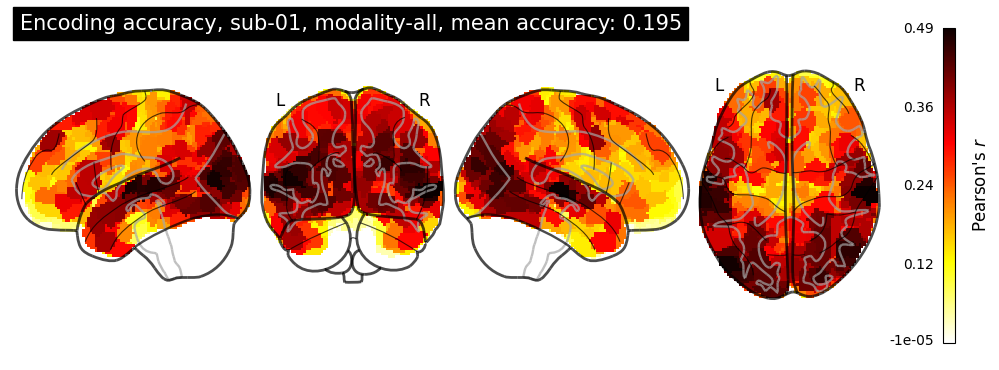

In [ ]:
def compute_encoding_accuracy(fmri_val, fmri_val_pred, subject, modality):
    """
    Compare the  recorded (ground truth) and predicted fMRI responses, using a
    Pearson's correlation. The comparison is perfomed independently for each
    fMRI parcel. The correlation results are then plotted on a glass brain.

    Parameters
    ----------
    fmri_val : float
        fMRI responses for the validation movies.
    fmri_val_pred : float
        Predicted fMRI responses for the validation movies
    subject : int
        Subject number used to train and validate the encoding model.
    modality : str
        Feature modality used to train and validate the encoding model.

    """

    ### Correlate recorded and predicted fMRI responses ###
    encoding_accuracy = np.zeros((fmri_val.shape[1]), dtype=np.float32)
    for p in range(len(encoding_accuracy)):
        encoding_accuracy[p] = pearsonr(fmri_val[:, p],
            fmri_val_pred[:, p])[0]
    mean_encoding_accuracy = np.round(np.mean(encoding_accuracy), 3)

    ### Map the prediction accuracy onto a 3D brain atlas for plotting ###
    atlas_file = f'sub-0{subject}_space-MNI152NLin2009cAsym_atlas-Schaefer18_parcel-1000Par7Net_desc-dseg_parcellation.nii.gz'
    atlas_path = os.path.join(root_data_dir, 'algonauts_2025.competitors',
        'fmri', f'sub-0{subject}', 'atlas', atlas_file)
    atlas_masker = NiftiLabelsMasker(labels_img=atlas_path)
    atlas_masker.fit()
    encoding_accuracy_nii = atlas_masker.inverse_transform(encoding_accuracy)

    ### Plot the encoding accuracy ###
    title = f"Encoding accuracy, sub-0{subject}, modality-{modality}, mean accuracy: " + str(mean_encoding_accuracy)
    display = plotting.plot_glass_brain(
        encoding_accuracy_nii,
        display_mode="lyrz",
        cmap='hot_r',
        colorbar=True,
        plot_abs=False,
        symmetric_cbar=False,
        title=title
    )
    colorbar = display._cbar
    colorbar.set_label("Pearson's $r$", rotation=90, labelpad=12, fontsize=12)
    plotting.show()

compute_encoding_accuracy(fmri_val, fmri_val_pred, subject, modality)

---

# 4 | Prepare the challenge submission

In this section, you will learn to prepare and format an encoding models' predictions for challenge submissions, using the pretrained challenge baseline encoding models. These encoding models were trained using stimuli (visual + audio + language) and fMRI responses for Friends seasons 1-6 plus Movie10, using a [`RidgeCV`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.RidgeCV.html) regression (you can find the code used to train the challenge baseline encoding models [here]()). Since the challenge submissions for the **Model building phase** require predicted fMRI responses for all four challenge subjects to Friends season 7 (i.e., the test stimuli of the **Model building phase**), you will load and use the baseline encoding models for each of the four subjects.



## 4.1 | Load the stimulus features for the test stimuli

You will begin by loading the pre-computed and PCA-downsampled stimulus features for Friends season 7 (the test stimuli of the **Model building phase**), which can be found at `../stimulus_features/pca/friends_movie10/<modality>/features_test.npy`, where:
- **`modality`:** String indicating the stimulus modality of the extracted features. Since the challenge baseline encoding models were trained using all three stimulus modalities together, here you will use the `modality` value `"all"`.

In [ ]:
def load_stimulus_features_friends_s7(root_data_dir):
    """
    Load the stimulus features of all modalities (visual + audio + language) for
    Friends season 7.

    Parameters
    ----------
    root_data_dir : str
        Root data directory.

    Returns
    -------
    features_friends_s7 : dict
        Dictionary containing the stimulus features for Friends season 7.

    """

    features_friends_s7 = {}

    ### Load the visual features ###
    stimuli_dir = os.path.join(root_data_dir, 'stimulus_features', 'pca',
        'friends_movie10', 'visual', 'features_test.npy')
    features_friends_s7['visual'] = np.load(stimuli_dir,
        allow_pickle=True).item()

    ### Load the audio features ###
    stimuli_dir = os.path.join(root_data_dir, 'stimulus_features', 'pca',
        'friends_movie10', 'audio', 'features_test.npy')
    features_friends_s7['audio'] = np.load(stimuli_dir,
        allow_pickle=True).item()

    ### Load the language features ###
    stimuli_dir = os.path.join(root_data_dir, 'stimulus_features', 'pca',
        'friends_movie10', 'language', 'features_test.npy')
    features_friends_s7['language'] = np.load(stimuli_dir,
        allow_pickle=True).item()

    ### Output ###
    return features_friends_s7

In [ ]:
# Load the stimulus features
features_friends_s7 = load_stimulus_features_friends_s7(root_data_dir)

# Print all available movies for each stimulus modality
for key_modality, value_modality in features_friends_s7.items():
    print(f"\n{key_modality} features movie names and shape:")
    for key_movie, value_movie in value_modality.items():
        print(key_movie + " " + str(value_movie.shape))


visual features movie names and shape:
s07e01a (459, 250)
s07e01b (493, 250)
s07e02a (491, 250)
s07e02b (525, 250)
s07e03a (417, 250)
s07e03b (451, 250)
s07e04a (447, 250)
s07e04b (481, 250)
s07e05a (453, 250)
s07e05b (487, 250)
s07e06a (477, 250)
s07e06b (512, 250)
s07e07a (472, 250)
s07e07b (506, 250)
s07e08a (474, 250)
s07e08b (508, 250)
s07e09a (450, 250)
s07e09b (484, 250)
s07e10a (459, 250)
s07e10b (493, 250)
s07e11a (464, 250)
s07e11b (498, 250)
s07e12a (451, 250)
s07e12b (486, 250)
s07e13a (539, 250)
s07e13b (573, 250)
s07e14a (466, 250)
s07e14b (500, 250)
s07e15a (566, 250)
s07e15b (600, 250)
s07e16a (397, 250)
s07e16b (401, 250)
s07e16c (431, 250)
s07e17a (432, 250)
s07e17b (467, 250)
s07e18a (476, 250)
s07e18b (511, 250)
s07e19a (436, 250)
s07e19b (470, 250)
s07e20a (453, 250)
s07e20b (487, 250)
s07e21a (429, 250)
s07e21b (463, 250)
s07e22a (471, 250)
s07e22b (505, 250)
s07e23a (480, 250)
s07e23b (484, 250)
s07e23c (484, 250)
s07e23d (514, 250)

audio features movie names a

## 4.2 | Align the stimulus features with the fMRI response samples

Now that you loaded the stimulus features for Friends season 7, you need to align these features with the corresponding fMRI response samples, so that the encoding models predict the correct fMRI samples for each episode of Friends season 7. Since the fMRI responses for Friends season 7 are withheld, the exact number of fMRI samples is made available at `../algonauts_2025.competitors/fmri/sub-0X/target_sample_number/sub-0X_friends-s7_fmri_samples.npy`.

<font color='red'><b>IMPORTANT:</b></font> The predicted fMRI responses for each subject and episode of Friends season 7 should have the exact sample number as indicated in the `sub-0X_friends-s7_fmri_samples.npy` files, otherwise the challenge scoring program will throw an error. Thus, during model prediction for the challenge submission, **no fMRI sample should be discarded as done during model training and testing in `Section 3`**. The scoring program will take care of this for you, by removing scores for the first five and last five fMRI samples in your submitted predictions.

The following function aligns the stimulus features with the fMRI response samples, and returns a two-layers nested dictionary with subject numbers (i.e., `sub-01`, `sub-02`, `sub-03`, `sub-05`) as first-layer keys, and Friends season 7 episode names (e.g., `s07e01a`) as second-layer keys. The values for the second dictionary layer are 2D arrays of stimulus features of shape `(N samples × Features)`, where *N* matches the sample dimensionality of the withheld fMRI responses provided in the `sub-0X_friends-s7_fmri_samples.npy` files.

In [ ]:
def align_features_and_fmri_samples_friends_s7(features_friends_s7,
    root_data_dir):
    """
    Align the stimulus feature with the fMRI response samples for Friends season
    7 episodes, later used to predict the fMRI responses for challenge
    submission.

    Parameters
    ----------
    features_friends_s7 : dict
        Dictionary containing the stimulus features for Friends season 7.
    root_data_dir : str
        Root data directory.

    Returns
    -------
    aligned_features_friends_s7 : dict
        Aligned stimulus features for each subject and Friends season 7 episode.

    """

    ### Empty results dictionary ###
    aligned_features_friends_s7 = {}

    ### HRF delay ###
    # fMRI detects the BOLD (Blood Oxygen Level Dependent) response, a signal
    # that reflects changes in blood oxygenation levels in response to activity
    # in the brain. Blood flow increases to a given brain region in response to
    # its activity. This vascular response, which follows the hemodynamic
    # response function (HRF), takes time. Typically, the HRF peaks around 5–6
    # seconds after a neural event: this delay reflects the time needed for
    # blood oxygenation changes to propagate and for the fMRI signal to capture
    # them. Therefore, this parameter introduces a delay between stimulus chunks
    # and fMRI samples for a better correspondence between input stimuli and the
    # brain response. For example, with a hrf_delay of 3, if the stimulus chunk
    # of interest is 17, the corresponding fMRI sample will be 20.

    ### Stimulus window ###
    # stimulus_window indicates how many stimulus feature samples are used to
    # model each fMRI sample, starting from the stimulus sample corresponding to
    # the fMRI sample of interest, minus the hrf_delay, and going back in time.
    # For example, with a stimulus_window of 5, and a hrf_delay of 3, if the
    # fMRI sample of interest is 20, it will be modeled with stimulus samples
    # [13, 14, 15, 16, 17]. Note that this only applies to visual and audio
    # features, since the language features were already extracted using
    # transcript words spanning several movie samples (thus, each fMRI sample
    # will only be modeled using the corresponding language feature sample,
    # minus the hrf_delay). Also note that a larger stimulus window will
    # increase compute time, since it increases the amount of stimulus features
    # used to train and validate the fMRI encoding models. Here you will use a
    # value of 5, since this is how the challenge baseline encoding models were
    # trained.
    stimulus_window = 5

    ### Loop over subjects ###
    subjects = [1, 2, 3, 5]
    desc = "Aligning stimulus and fMRI features of the four subjects"
    for sub in tqdm(subjects, desc=desc):
        aligned_features_friends_s7[f'sub-0{sub}'] = {}

        ### Load the Friends season 7 fMRI samples ###
        samples_dir = os.path.join(root_data_dir, 'algonauts_2025.competitors',
            'fmri', f'sub-0{sub}', 'target_sample_number',
            f'sub-0{sub}_friends-s7_fmri_samples.npy')
        fmri_samples = np.load(samples_dir, allow_pickle=True).item()

        ### Loop over Friends season 7 episodes ###
        for epi, samples in fmri_samples.items():
            features_epi = []

            ### Loop over fMRI samples ###
            for s in range(samples):
                # Empty variable containing the stimulus features of all
                # modalities for each sample
                f_all = np.empty(0)

                ### Loop across modalities ###
                for mod in features_friends_s7.keys():

                    ### Visual and audio features ###
                    # If visual or audio modality, model each fMRI sample using
                    # the N stimulus feature samples up to the fMRI sample of
                    # interest minus the hrf_delay (where N is defined by the
                    # 'stimulus_window' variable)
                    if mod == 'visual' or mod == 'audio':
                        # In case there are not N stimulus feature samples up to
                        # the fMRI sample of interest minus the hrf_delay (where
                        # N is defined by the 'stimulus_window' variable), model
                        # the fMRI sample using the first N stimulus feature
                        # samples
                        if s < (stimulus_window + hrf_delay):
                            idx_start = 0
                            idx_end = idx_start + stimulus_window
                        else:
                            idx_start = s - hrf_delay - stimulus_window + 1
                            idx_end = idx_start + stimulus_window
                        # In case there are less visual/audio feature samples
                        # than fMRI samples minus the hrf_delay, use the last N
                        # visual/audio feature samples available (where N is
                        # defined by the 'stimulus_window' variable)
                        if idx_end > len(features_friends_s7[mod][epi]):
                            idx_end = len(features_friends_s7[mod][epi])
                            idx_start = idx_end - stimulus_window
                        f = features_friends_s7[mod][epi][idx_start:idx_end]
                        f_all = np.append(f_all, f.flatten())

                    ### Language features ###
                    # Since language features already consist of embeddings
                    # spanning several samples, only model each fMRI sample
                    # using the corresponding stimulus feature sample minus the
                    # hrf_delay
                    elif mod == 'language':
                        idx = s - hrf_delay
                        # In case there are fewer language feature samples than
                        # fMRI samples minus the hrf_delay, use the last
                        # language feature sample available
                        if idx >= (len(features_friends_s7[mod][epi]) - hrf_delay):
                            f = features_friends_s7[mod][epi][-1,:]
                        else:
                            f = features_friends_s7[mod][epi][idx]
                        f_all = np.append(f_all, f.flatten())

                ### Append the stimulus features of all modalities for this sample ###
                features_epi.append(f_all)

            ### Add the episode stimulus features to the features dictionary ###
            aligned_features_friends_s7[f'sub-0{sub}'][epi] = np.asarray(
                features_epi, dtype=np.float32)

    return aligned_features_friends_s7

In [ ]:
# Align the stimulus features with the fMRI responses for Friends season 7
aligned_features_friends_s7 = align_features_and_fmri_samples_friends_s7(
    features_friends_s7, root_data_dir)

# As an example, print the shape of the stimulus features of one episode for
# each subject
for key, val in aligned_features_friends_s7.items():
    episode_name = "s07e01a"
    example_episode_shape = val[episode_name].shape
    print(f"Subject: {key}")
    print(f"  Episode: {episode_name} - Features shape: {example_episode_shape}")
    print("-" * 40)

Aligning stimulus and fMRI features of the four subjects:   0%|          | 0/4 [00:00<?, ?it/s]

Subject: sub-01
  Episode: s07e01a - Features shape: (460, 1600)
----------------------------------------
Subject: sub-02
  Episode: s07e01a - Features shape: (460, 1600)
----------------------------------------
Subject: sub-03
  Episode: s07e01a - Features shape: (460, 1600)
----------------------------------------
Subject: sub-05
  Episode: s07e01a - Features shape: (460, 1600)
----------------------------------------


## 4.3 | Load the pretrained challenge baseline encoding models

Here, you will load the four pretrained challenge baseline encoding models (one for each of the four challenge subjects). Each challenge baseline encoding model consists of a ridge regression which maps stimulus features onto fMRI responses.

In [ ]:
def load_baseline_encoding_models(root_data_dir):
    """
    Load the challenge baseline encoding models for all four challenge subject.
    These models were trained to predict fMRI responses to movies using all
    stimulus modalities (visual + audio + language)

    Parameters
    ----------
    root_data_dir : str
        Root data directory.

    Returns
    -------
    baseline_models : dict
        Pretrained challenge baseline RidgeCV models.

    """

    baseline_models = {}

    ### Loop over subjects ###
    subjects = [1, 2, 3, 5]
    for s in subjects:

        ### Load the trained encoding model weights ###
        weights_dir = os.path.join(root_data_dir, 'trained_encoding_models',
            'trained_encoding_model_sub-0'+str(s)+'_modality-all.npy')
        model_weights = np.load(weights_dir, allow_pickle=True).item()

        ### Initialize the Ridge regression and load the trained weights ###
        model = Ridge()
        model.coef_ = model_weights['coef_']
        model.intercept_ = model_weights['intercept_']
        model.n_features_in_ = model_weights['n_features_in_']

        ### Store the pretrained encoding model into a dictionary ###
        baseline_models['sub-0'+str(s)] = model
        del model

    ### Output ###
    return baseline_models

baseline_models = load_baseline_encoding_models(root_data_dir)

## 4.4 | Predict the fMRI responses for the test stimuli, and format predictions for challenge submission

Here, you will use the stimulus features and the pretrained challenge baseline encoding models to predict the fMRI responses for Friends season 7 (the test stimuli of the **Model building phase**).

<font color='red'><b>For submission to [Codabench](https://www.codabench.org/competitions/4313/), the predicted fMRI responses for Friends season 7 have to be organized in the following nested dictionary structure (otherwise the scoring program will throw an error):</b></font>

- **First-Layer Keys:** Each subject IDs (i.e., `"sub-01"`, `"sub-02"`, `"sub-03"` `"sub-05"`).
- **Second-Layer Keys:** Under each subject, the nested second-layer keys consist of Friends season 7 episode names (i.e., from `"s07e01a"` to `"s07e23d"`). Each key is paired with a value that is a 2D array containing the predicted fMRI responses for a given episode. Each array is of shape `(Samples, 1,000)`, where:
  - **Samples** is the number of fMRI samples for each episode, which should correspond to the sample number indicated in the `sub-0X_friends-s7_fmri_samples.npy` files.
  - **1,000** represents the number of fMRI parcels covering the entire brain.

Here is a visualization of how the nested dictionary structure should look like for a submission to Codabench:

```python
{
    "sub-01": {
        "s07e01a": array([[...], [...], ...], dtype=float32),
        ...
        "s07e23d": array([[...], [...], ...], dtype=float32),
    },
    "sub-02": {
        "s07e01a": array([[...], [...], ...], dtype=float32),
        ...
        "s07e23d": array([[...], [...], ...], dtype=float32),
    },
    "sub-03": {
        "s07e01a": array([[...], [...], ...], dtype=float32),
        ...
        "s07e23d": array([[...], [...], ...], dtype=float32),
    },
    "sub-05": {
        "s07e01a": array([[...], [...], ...], dtype=float32),
        ...
        "s07e23d": array([[...], [...], ...], dtype=float32),
    }
}
```

<font color='red'><b>NOTE:</b></font><b> To reduce submission size and the running time of the scoring program, we recommend converting these 2D arrays to `float32` format prior to submission.</b>

In [ ]:
# Empty submission predictions dictionary
submission_predictions = {}

# Loop through each subject
desc = "Predicting fMRI responses of each subject"
for sub, features in tqdm(aligned_features_friends_s7.items(), desc=desc):

    # Initialize the nested dictionary for each subject's predictions
    submission_predictions[sub] = {}

    # Loop through each Friends season 7 episode
    for epi, feat_epi in features.items():

        # Predict fMRI responses for the aligned features of this episode, and
        # convert the predictions to float32
        fmri_pred = baseline_models[sub].predict(feat_epi).astype(np.float32)

        # Store formatted predictions in the nested dictionary
        submission_predictions[sub][epi] = fmri_pred

Predicting fMRI responses of each subject:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Display the structure and shapes of the predicted fMRI responses dictionary
for subject, episodes_dict in submission_predictions.items():
    # Print the subject and episode number for Friends season 7
    print(f"Subject: {subject}")
    print(f"  Number of Episodes: {len(episodes_dict)}")
    # Print the predicted fMRI response shape for each episode
    for episode, predictions in episodes_dict.items():
        print(f"    - Episode: {episode}, Predicted fMRI shape: {predictions.shape}")
    print("-" * 40)  # Separator for clarity

Subject: sub-01
  Number of Episodes: 49
    - Episode: s07e01a, Predicted fMRI shape: (460, 1000)
    - Episode: s07e01b, Predicted fMRI shape: (494, 1000)
    - Episode: s07e02a, Predicted fMRI shape: (492, 1000)
    - Episode: s07e02b, Predicted fMRI shape: (526, 1000)
    - Episode: s07e03a, Predicted fMRI shape: (417, 1000)
    - Episode: s07e03b, Predicted fMRI shape: (452, 1000)
    - Episode: s07e04a, Predicted fMRI shape: (447, 1000)
    - Episode: s07e04b, Predicted fMRI shape: (482, 1000)
    - Episode: s07e05a, Predicted fMRI shape: (454, 1000)
    - Episode: s07e05b, Predicted fMRI shape: (488, 1000)
    - Episode: s07e06a, Predicted fMRI shape: (478, 1000)
    - Episode: s07e06b, Predicted fMRI shape: (513, 1000)
    - Episode: s07e07a, Predicted fMRI shape: (473, 1000)
    - Episode: s07e07b, Predicted fMRI shape: (507, 1000)
    - Episode: s07e08a, Predicted fMRI shape: (474, 1000)
    - Episode: s07e08b, Predicted fMRI shape: (509, 1000)
    - Episode: s07e09a, Predict

Finally, here you will save the predicted fMRI response dictionary as a `.npy` file, and zip this file for submission to [Codabench](https://www.codabench.org/competitions/4313/). <font color='red'><b>NOTE:</b></font> **The scoring program will throw an error if the submission file is not a zipped `.npy` file.**

[This video](!!!) goes over the Codabench competition website layout, walks you through an example submission, and explains the submission outputs.

In [ ]:
# Select the saving directory
save_dir = '/content/drive/MyDrive/' #@param {type:"string"}

# Save the predicted fMRI dictionary as a .npy file
output_file = save_dir + "fmri_predictions_friends_s7.npy"
np.save(output_file, submission_predictions)
print(f"Formatted predictions saved to: {output_file}")

# Zip the saved file for submission
zip_file = save_dir + "fmri_predictions_friends_s7.zip"
with zipfile.ZipFile(zip_file, 'w') as zipf:
    zipf.write(output_file, os.path.basename(output_file))
print(f"Submission file successfully zipped as: {zip_file}")

Formatted predictions saved to: /content/drive/MyDrive/fmri_predictions_friends_s7.npy
Submission file successfully zipped as: /content/drive/MyDrive/fmri_predictions_friends_s7.zip
